# Predicting Electromyography (EMG) Signal for Gesture     Recognition

------------------

# Authors: Athanasios Skaltsas, Christos Stamopoulos
>## Octomber 2022

-----------------------

## Table of Contents
### 1.Intoduction/Precise problem statement
### 2.Experiment
### 3.Data Analysis
>#### 3.1 Boxplots
>#### 3.2 Heatmaps
### 4.Normalizing the Data
### 5.Experimental Results/Machine Learning Algorithms
>   #### 5.1 Logistic Regression Model
  > #### 5.2 K Nearest Neighbors (KNN) CLASSIFIER
  > #### 5.3 Random Forest
    > #### 5.4 Comparison of the methods

### 6.Residuals Analysis
### 7.Concluding Remarks
### Appendix
> ####      Boxplots
> ####      Heatmaps

---------------------------

### 1.Intoduction/Precise problem statement
For recording patterns, we used a MYO Thalmic bracelet worn on a user’s forearm, and a PC with a Bluetooth receiver. The bracelet is equipped with eight sensors equally spaced around the forearm that simultaneously acquire myographic signals. The signals are sent through a Bluetooth interface to a PC.

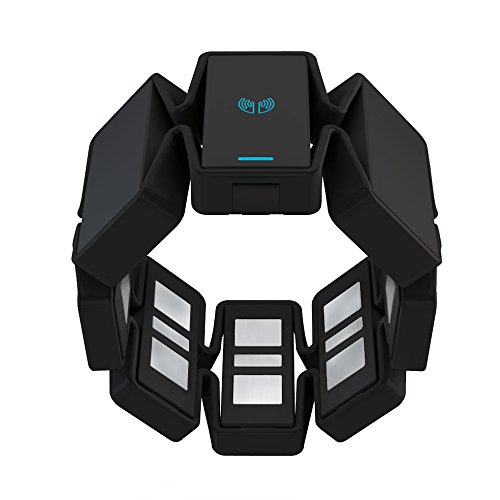

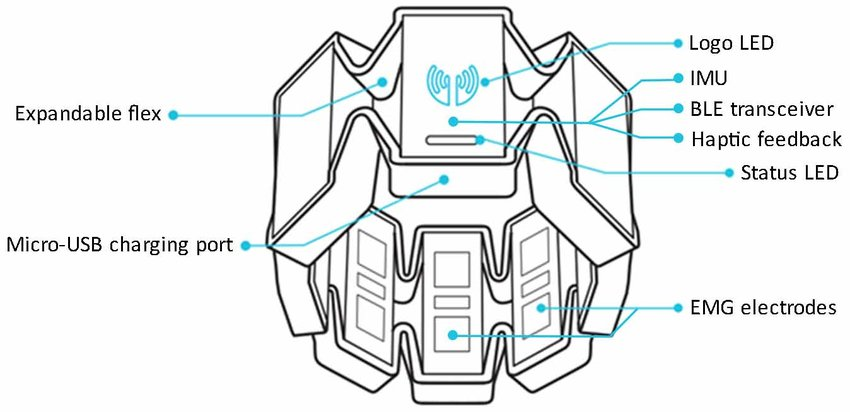

### 2.Experiment
The files of raw EMG data recorded by MYO Thalmic bracelet from [Center for Machine Learning and Intelligent Systems -University of California, Irvine (UCI)](https://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures), but the data of this project are imported by Kaggle,[EMG Signal for gesture recognition](https://www.kaggle.com/datasets/sojanprajapati/emg-signal-for-gesture-recognition), which are ready for analysis.

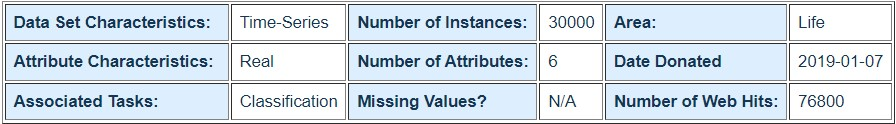

We present EMG data for 36 subjects while they performed series of static hand gestures.The subject performs two series, each of which consists of six (seven) basic gestures. Each gesture was performed for 3 seconds with a pause of 3 seconds between gestures.
The file of data consist of 11 columns:
> Column 1: Time - time in ms

> Column 2-9: Channel - eight EMG channels of MYO Thalmic bracelet

> Column 10: Class – the label of gestures:
>> 0 - unmarked data,
>>1 - hand at rest,
>>2 - hand clenched in a fist,
>>3 - wrist flexion,
>>4 – wrist extension,
>>5 – radial deviations,
>>6 - ulnar deviations,
>>7 - extended palm (the gesture was not performed by all subjects).

> Column 11: Label - refers to the subject who performed the experiment. There were 36 subjects, each performed 7 gestures twice.

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import accuracy_score

In [2]:
#Importing the data
df=pd.read_csv('EMG-data.csv')
df

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0            1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1            5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2            6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3            7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4            8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...        ...       ...       ...       ...       ...       ...       ...   
4237902  50962   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237903  50963   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237904  50964   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237905  50965   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
4237906  50966   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   

         channel7  channel8  class  label  
0         0.00000  -0.00001      0      1  
1         0.00000  -0.00001      0      1  
2        -0.00001   0.00001      0      1  
3        -0.00001   0.00001      0      1  
4        -0.00001   0.00001      0      1  
...           ...       ...    ...    ...  
4237902   0.00002   0.00002      0     36  
4237903   0.00002   0.00002      0     36  
4237904   0.00002   0.00002      0     36  
4237905   0.00002   0.00002      0     36  
4237906   0.00002   0.00002      0     36  

[4237907 rows x 11 columns]

At the "filtered_df" is created the new data set without the unmarked data (class = 0)

In [3]:
filtered_df=df[df['class']!=0]
filtered_df

time  channel1  channel2  channel3  channel4  channel5  channel6  \
2287      2400  -0.00001   0.00000  -0.00001   0.00000   0.00000  -0.00001   
2288      2401  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2289      2402  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2290      2403  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2291      2404  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
...        ...       ...       ...       ...       ...       ...       ...   
4237207  50226   0.00009   0.00001   0.00003   0.00001  -0.00003  -0.00008   
4237208  50227   0.00009   0.00001   0.00003   0.00001  -0.00003  -0.00008   
4237209  50228   0.00009   0.00001   0.00003   0.00001  -0.00003  -0.00008   
4237210  50229   0.00014   0.00003  -0.00001   0.00001  -0.00012   0.00006   
4237211  50230   0.00014   0.00003  -0.00001   0.00001  -0.00012   0.00006   

         channel7  channel8  class  label  
2287     -0.00001   0.00001      1      1  
2288     -0.00003  -0.00002      1      1  
2289     -0.00003  -0.00002      1      1  
2290     -0.00003  -0.00002      1      1  
2291     -0.00003  -0.00002      1      1  
...           ...       ...    ...    ...  
4237207   0.00004   0.00000      6     36  
4237208   0.00004   0.00000      6     36  
4237209   0.00004   0.00000      6     36  
4237210  -0.00007  -0.00013      6     36  
4237211  -0.00007  -0.00013      6     36  

[1512750 rows x 11 columns]

The new number of instances

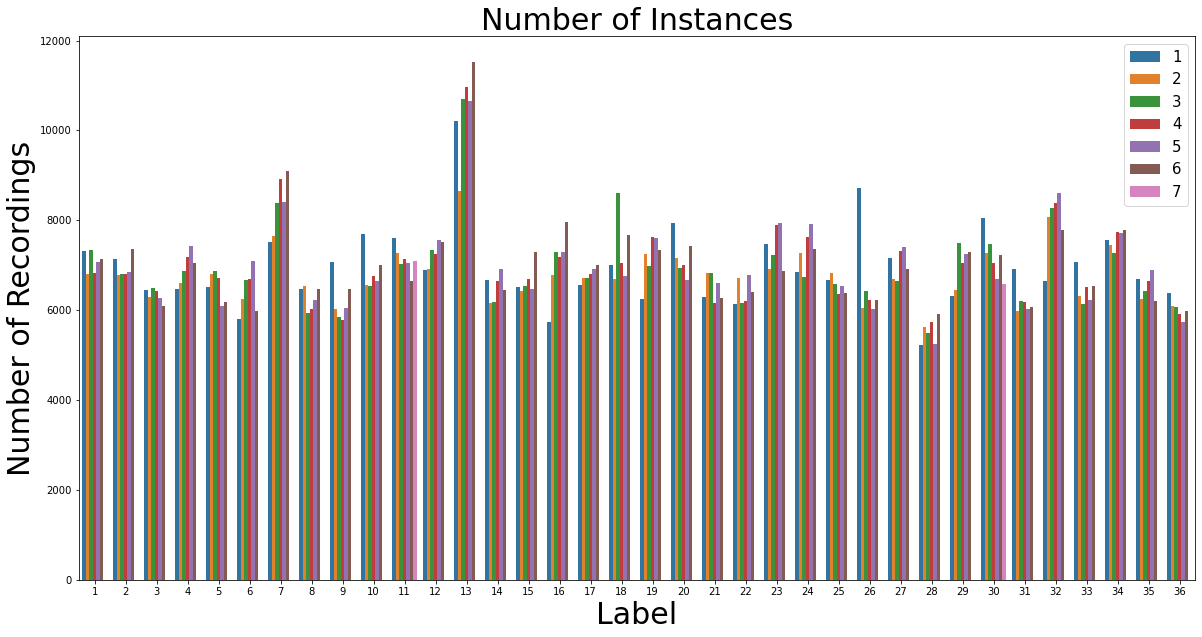

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(x='label', hue='class', data=filtered_df)

# Add legend
plt.legend(fontsize=15)

# Add title
plt.title("Number of Instances",fontsize=30)

# # Add labels
plt.xlabel("Label",fontsize=30)
plt.ylabel("Number of Recordings",fontsize=30)

plt.show()

### 3.Data Analysis

#### 3.1 Boxplots
Boxplots are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. 
To be more specific Box plot is a method which graphically show the spread of a numerical variable through quartiles.

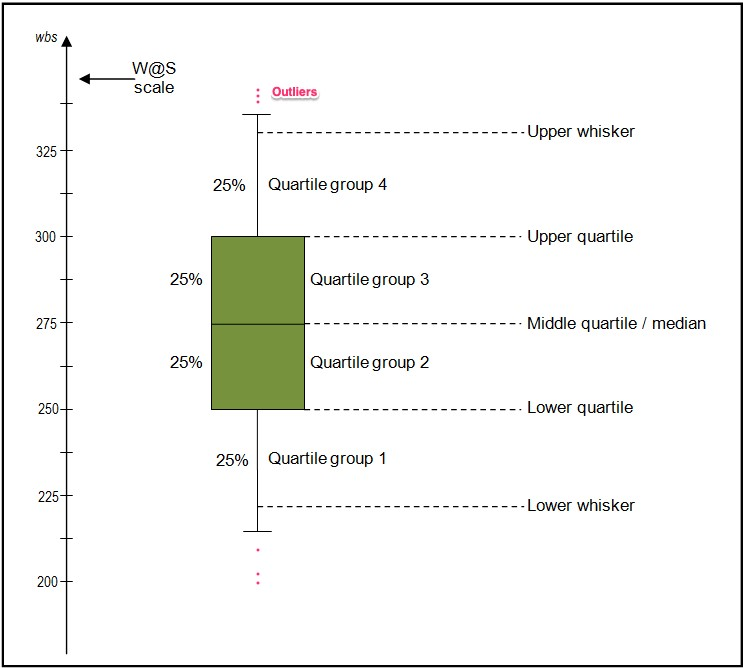

The first step of present analysis is about the box plots between channels and labels. Indicatively, is presented the box plot of channel 1, while the box plots of other channels are demonstrated to the Appendix chapter.

Even if the data have been cleaned, the box plot shows that there are plenty of outliers, especially for the the 7th label. The 7th label demonstrate a lot more outliers and more extended compared to other labels. The modeling could be optimized by removing the outliers of all labels or the 7th label.

A hypothesis is made that the outliers of our data will not impact the performance of the machine learning models that will be used in this project 

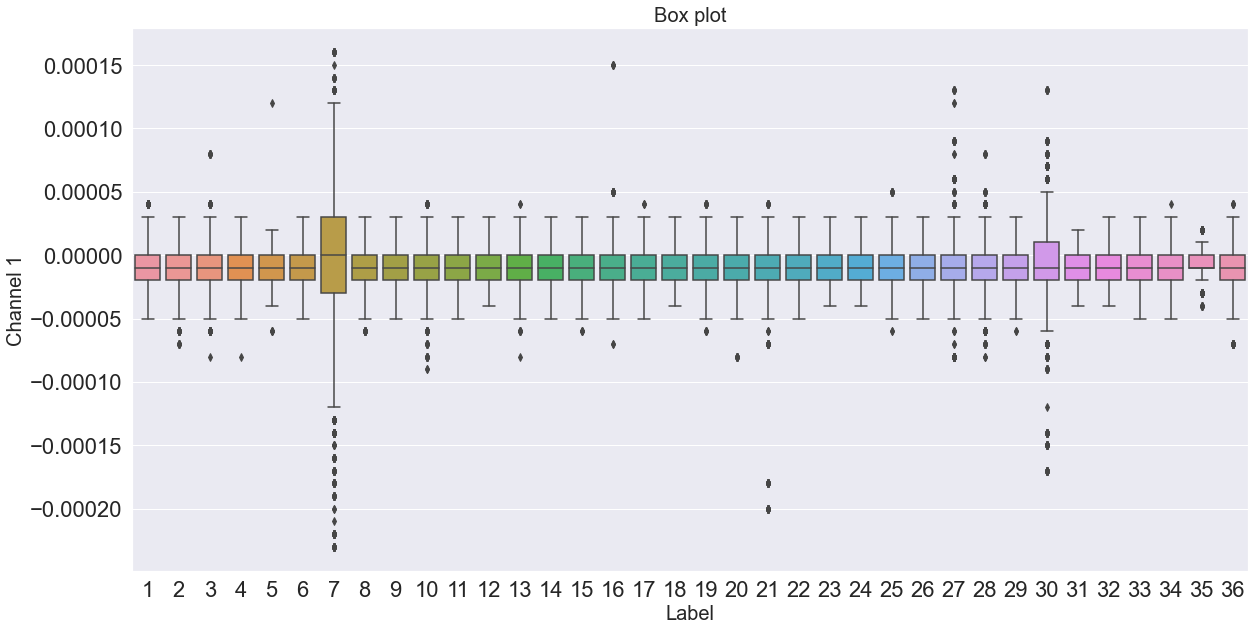

In [5]:
class1=df[df['class']==1] # matrix with the class=1
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x='label',y='channel1',data=class1)
plt.xlabel('Label',fontsize=20)
plt.ylabel('Channel 1',fontsize=20)
plt.title('Box plot',fontsize=20)
plt.show()

Below, it is demonstrated more information about the data of class 1.

In [6]:
class1.describe()

time       channel1       channel2       channel3  \
count  250055.000000  250055.000000  250055.000000  250055.000000   
mean    17544.549507      -0.000008      -0.000010      -0.000010   
std     15818.264801       0.000017       0.000024       0.000044   
min         1.000000      -0.000230      -0.000840      -0.000670   
25%      2320.000000      -0.000020      -0.000020      -0.000030   
50%      4338.000000      -0.000010      -0.000010      -0.000010   
75%     33267.000000       0.000000       0.000000       0.000010   
max     45596.000000       0.000160       0.000320       0.000550   

            channel4       channel5       channel6       channel7  \
count  250055.000000  250055.000000  250055.000000  250055.000000   
mean       -0.000009      -0.000010      -0.000009      -0.000009   
std         0.000044       0.000058       0.000040       0.000017   
min        -0.000600      -0.001120      -0.001120      -0.000250   
25%        -0.000030      -0.000020      -0.000020      -0.000020   
50%        -0.000010      -0.000010      -0.000010      -0.000010   
75%         0.000010       0.000000       0.000000       0.000000   
max         0.000770       0.001200       0.000680       0.000500   

            channel8     class          label  
count  250055.000000  250055.0  250055.000000  
mean       -0.000009       1.0      18.478759  
std         0.000016       0.0      10.348574  
min        -0.000340       1.0       1.000000  
25%        -0.000020       1.0      10.000000  
50%        -0.000010       1.0      18.000000  
75%         0.000000       1.0      27.000000  
max         0.000490       1.0      36.000000

In case that the model need to be optimized, the code below will be used to remove the outliers. Especially, the outliers of 7th label (std=0.000017) have the most significant impact on the models' accuracy.

In [7]:
outliers_of_class1_ch1=class1[(class1['channel1']>0.000017)|(class1['channel1']<-0.000017)]
outliers_of_class1_ch1[outliers_of_class1_ch1['label']==7]

time  channel1  channel2  channel3  channel4  channel5  channel6  \
686394   2064   0.00006   0.00002  -0.00002  -0.00006  -0.00010  -0.00001   
686395   2065   0.00006   0.00002  -0.00002  -0.00006  -0.00010  -0.00001   
686396   2066   0.00006   0.00002  -0.00002  -0.00006  -0.00010  -0.00001   
686397   2067   0.00006   0.00002  -0.00002  -0.00006  -0.00010  -0.00001   
686398   2068   0.00006   0.00002  -0.00002  -0.00006  -0.00010  -0.00001   
...       ...       ...       ...       ...       ...       ...       ...   
787975  35854  -0.00008  -0.00003   0.00003   0.00019   0.00037   0.00001   
787976  35855  -0.00008  -0.00003   0.00003   0.00019   0.00037   0.00001   
787977  35856  -0.00008  -0.00003   0.00003   0.00019   0.00037   0.00001   
787978  35857  -0.00008  -0.00003   0.00003   0.00019   0.00037   0.00001   
787979  35858  -0.00008  -0.00003   0.00003   0.00019   0.00037   0.00001   

        channel7  channel8  class  label  
686394   0.00002   0.00001      1      7  
686395   0.00002   0.00001      1      7  
686396   0.00002   0.00001      1      7  
686397   0.00002   0.00001      1      7  
686398   0.00002   0.00001      1      7  
...          ...       ...    ...    ...  
787975   0.00000  -0.00001      1      7  
787976   0.00000  -0.00001      1      7  
787977   0.00000  -0.00001      1      7  
787978   0.00000  -0.00001      1      7  
787979   0.00000  -0.00001      1      7  

[5333 rows x 11 columns]

#### 3.2 Heatmaps
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours.
The heatmap below represent the correlation between channels. It is observed below that there is no significant correlation between the channels of class 1. The heatmaps of other classes are demonstrated to the Appendix chapter.

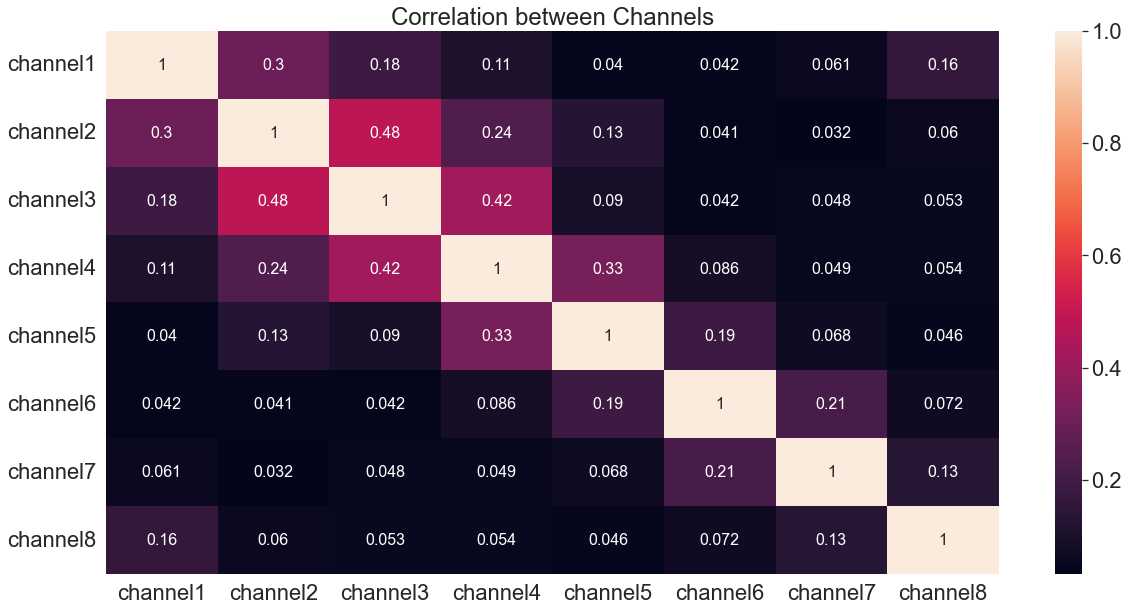

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df[df['class']==1].drop(columns=['time','label','class']).corr(),annot=True,
            annot_kws={"size": 16})
sns.set(font_scale=2)
plt.title('Correlation between Channels')
plt.show()

### 4.Normalizing the Data
In order to apply the machine learning algorithms of 5th chapter, the data should be normalized.

In [9]:
df1=df.drop(columns=['time','label'])
df1=df[df['class']!=0]

In [10]:
scaler = StandardScaler()
scaler.fit(df1.drop('class',axis=1))
scaled_features = scaler.transform(df1.drop('class',axis=1))

### 5.Experimental Results/Machine Learning Algorithms

SPLITTING DATA TO 70% TRAIN & 30% TEST

In [11]:
X = df1.drop(columns='class',axis=1)
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df1['class'],
                                                    test_size=0.30)

#### 5.1 Logistic Regression Model
Logistic Regression is a machine learning method used for Binary Classification. Consequently, a low value of accuracy is expected.

In [12]:
LR = LogisticRegression()
LR_fit = LR.fit(X_train, y_train)
LR_pred = LR_fit.predict(X_test)
print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, y_test)*100))

Logistic Regression is 17.663196 percent accurate


#### 5.2 K Nearest Neighbors (KNN) CLASSIFIER
Due to the fact that the dataset is high dimensional, it is easily concluded that by increasing the number of neighbors, the performance is decreasing.

In [13]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

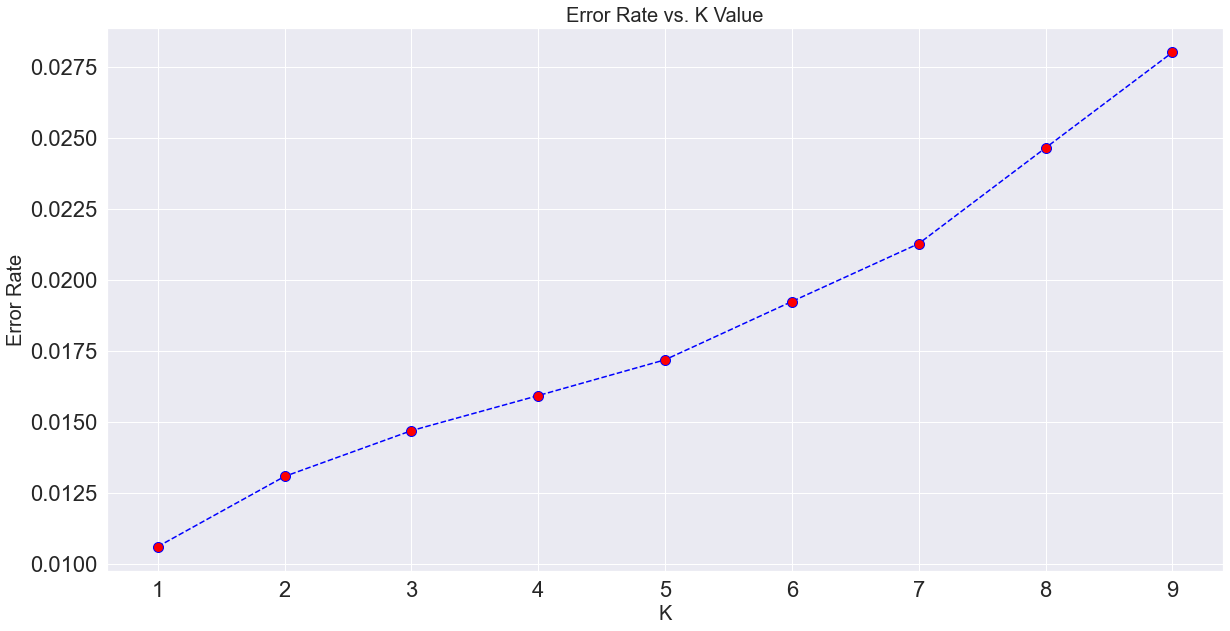

In [14]:
plt.figure(figsize=(20,10))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
sns.set(font_scale=2)
plt.title('Error Rate vs. K Value',fontsize=20)
plt.xlabel('K',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     74977
           2       0.99      0.99      0.99     72896
           3       0.99      0.99      0.99     74870
           4       0.98      0.99      0.99     75455
           5       0.99      0.99      0.99     75592
           6       0.99      0.99      0.99     75862
           7       0.98      0.98      0.98      4173

    accuracy                           0.99    453825
   macro avg       0.99      0.99      0.99    453825
weighted avg       0.99      0.99      0.99    453825



In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     74977
           2       0.98      0.97      0.98     72896
           3       0.98      0.98      0.98     74870
           4       0.97      0.98      0.97     75455
           5       0.97      0.97      0.97     75592
           6       0.98      0.98      0.98     75862
           7       0.97      0.95      0.96      4173

    accuracy                           0.98    453825
   macro avg       0.98      0.98      0.98    453825
weighted avg       0.98      0.98      0.98    453825



#### 5.3 Random Forest
Random forest method is expected to be the most fitting classification method to this problem than the previous machine learning algorithms, due to the complexity of compination of decision trees.

In [18]:
RF = RandomForestClassifier()
RF_fit = RF.fit(X_train, y_train)
RF_pred = RF_fit.predict(X_test)
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, y_test)*100))

Random Forests is 99.621440 percent accurate


#### 5.4 Comparison of the methods

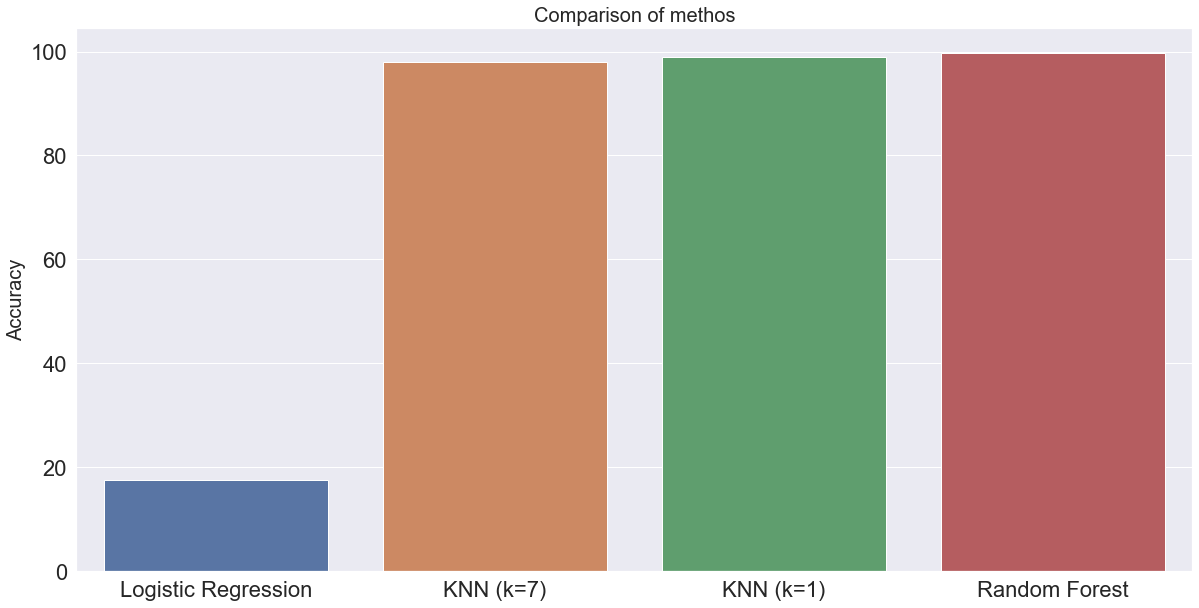

In [19]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Comparison of methos',fontsize=20)
sns.barplot(x=['Logistic Regression', 'KNN (k=7)', 'KNN (k=1)', 'Random Forest'], y=[17.63, 98, 99, 99.62])
plt.show()

### 6.Residuals Analysis

In [20]:
#RESIDUALS ANALYSIS
error=RF_pred-y_test #calculating the error of random forest method
error=pd.DataFrame(error)

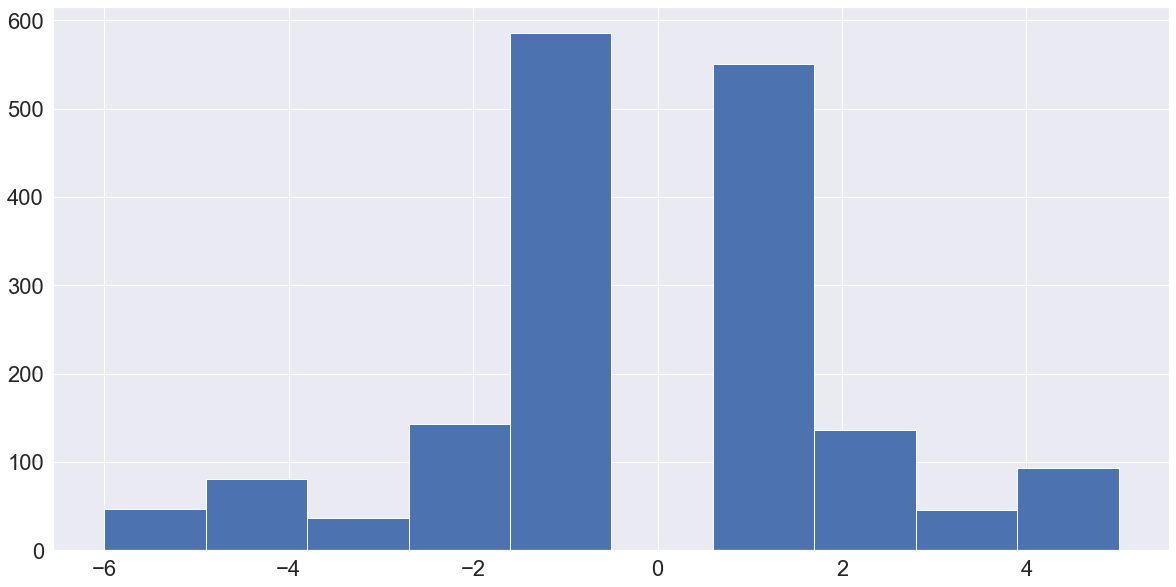

In [21]:
plt.figure(figsize=(20,10))
df_with_res=df1.merge(error,left_index=True, right_index=True).rename(columns={'class_y':'residuals'})
df_with_res=df_with_res[df_with_res['residuals']!=0]
df_with_res['residuals'].hist()
plt.show()

From a quick residuals analysis, it can be easily stated that our model may incorrectly predict movement 5 for movement 6 and vice versa.

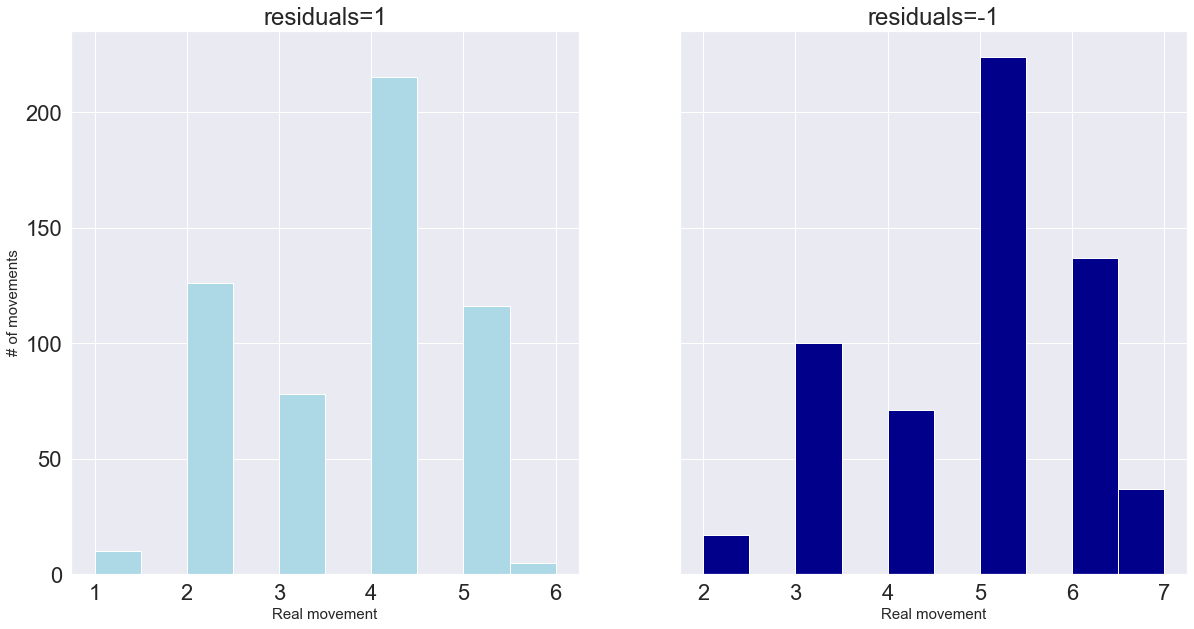

In [22]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(20,10))
df_with_res[(df_with_res['residuals']==1)]['class_x'].plot(kind='hist',title='residuals=1',xlabel='ad',ax=axes[0],grid='on',color='lightblue')

df_with_res[(df_with_res['residuals']==-1)]['class_x'].plot(kind='hist',title='residuals=-1',xlabel='ad',ax=axes[1],grid='on',color='darkblue')

axes[0].set_xlabel('Real movement',fontsize=15)
axes[1].set_xlabel('Real movement',fontsize=15)
axes[0].set_ylabel('# of movements',fontsize=15)
plt.show()


### 6.Concluding Remarks
The conclusion of this project is:
>1) The hypothesis of not removing the outliers has no significant impact to the performance of machine learning methods.

>2) The random forest method scores the best value of accuracy than Logistic Regression and KNN methods.

>3) Accuracies of our model is expected to be high, due to the large amount of training data

### Appendix

#### Data Analysis
>##### Boxplots

##### Boxplots of Class 1

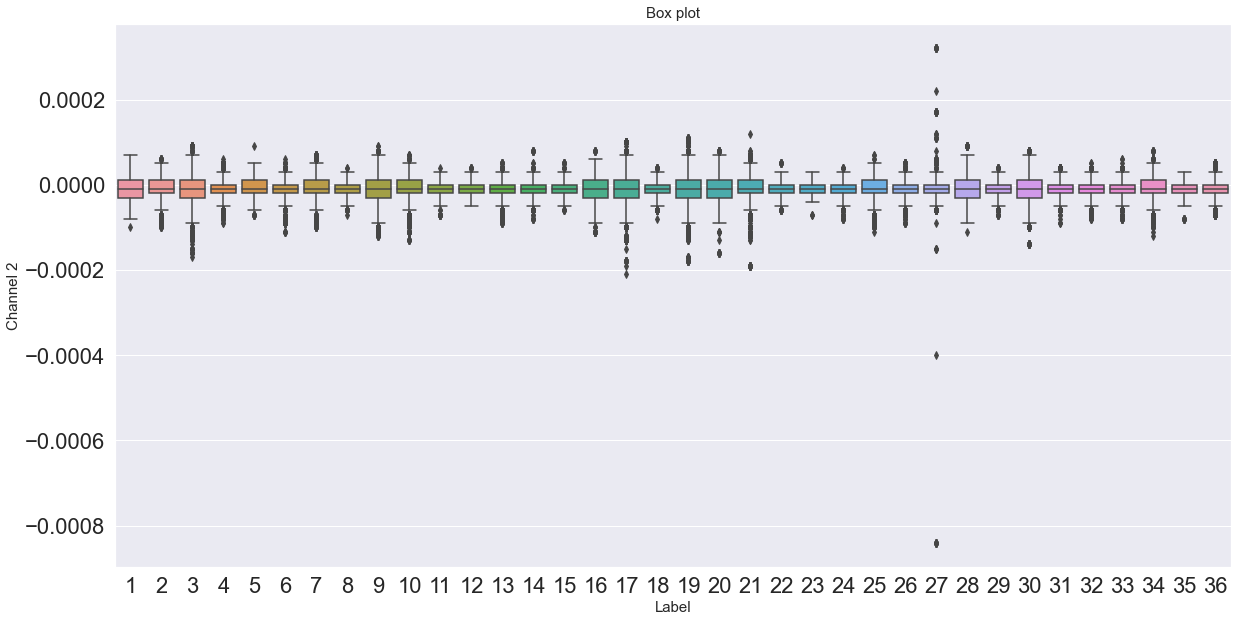

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel2',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 2',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

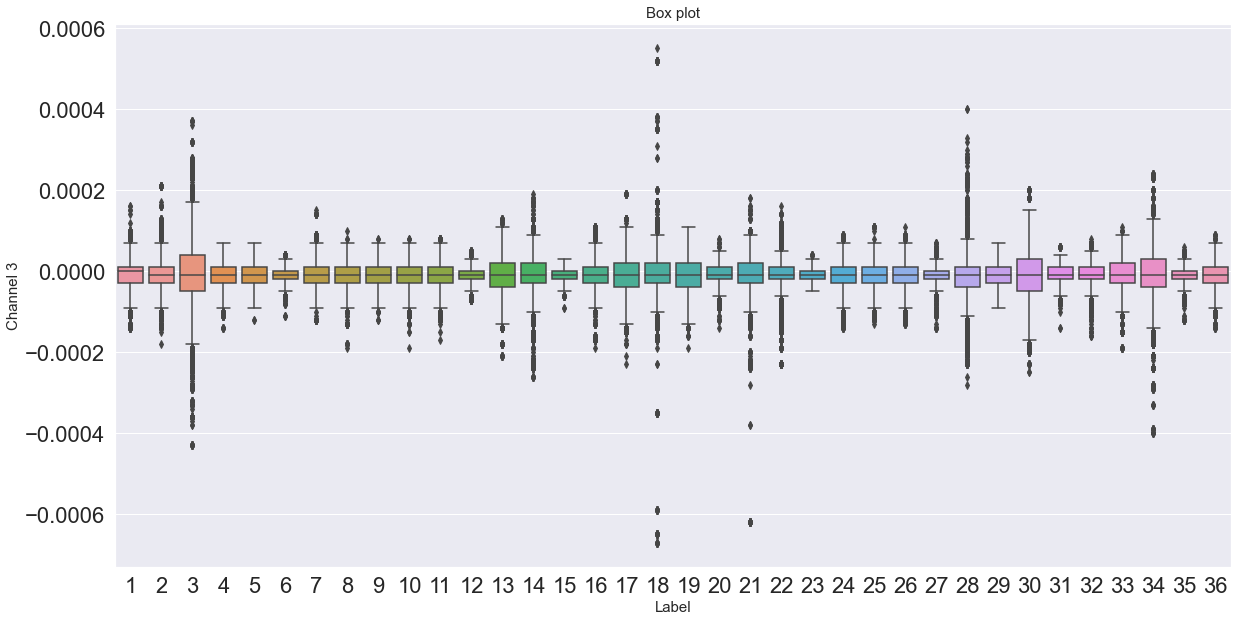

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel3',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 3',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

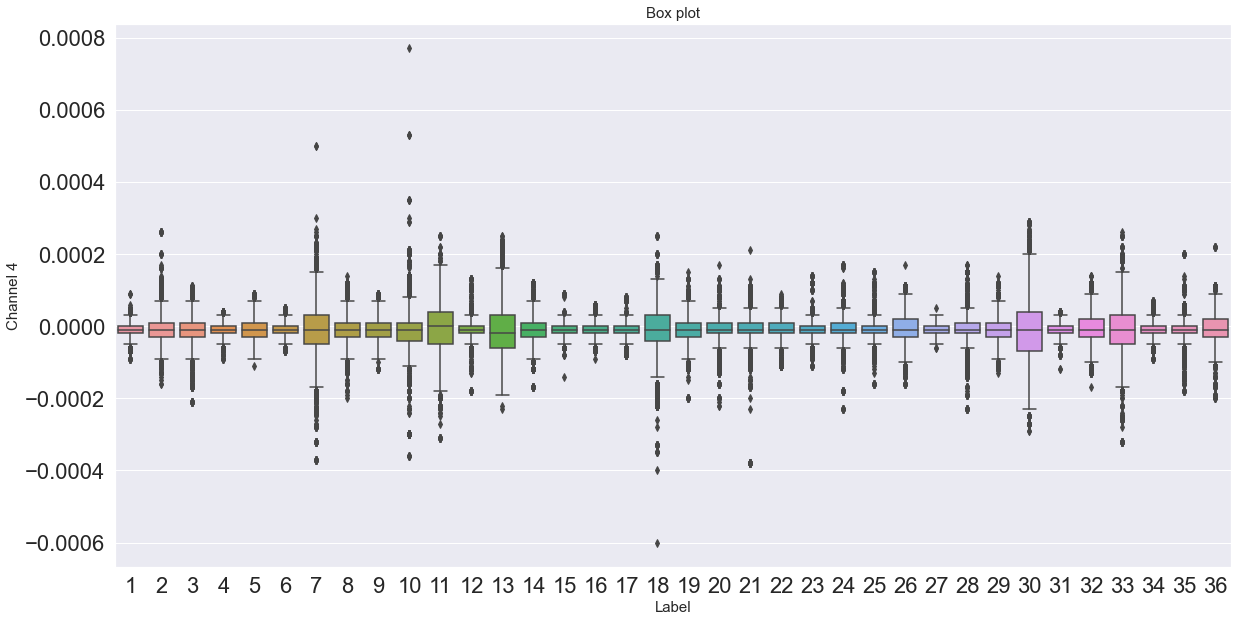

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel4',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 4',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

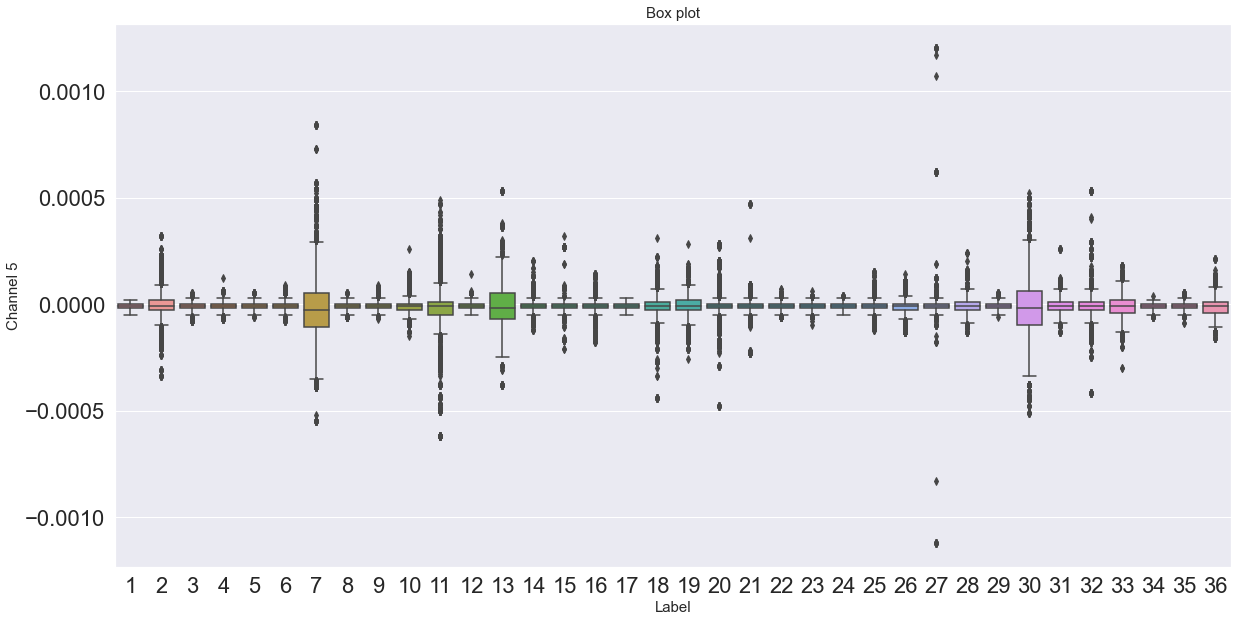

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel5',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 5',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

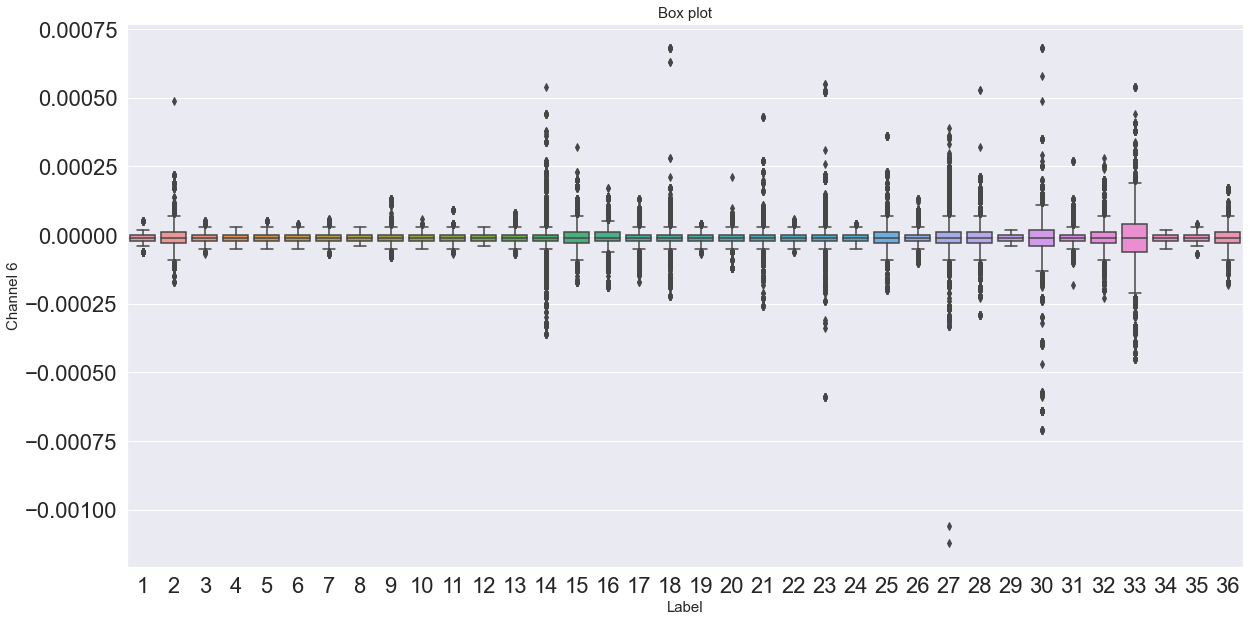

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel6',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 6',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

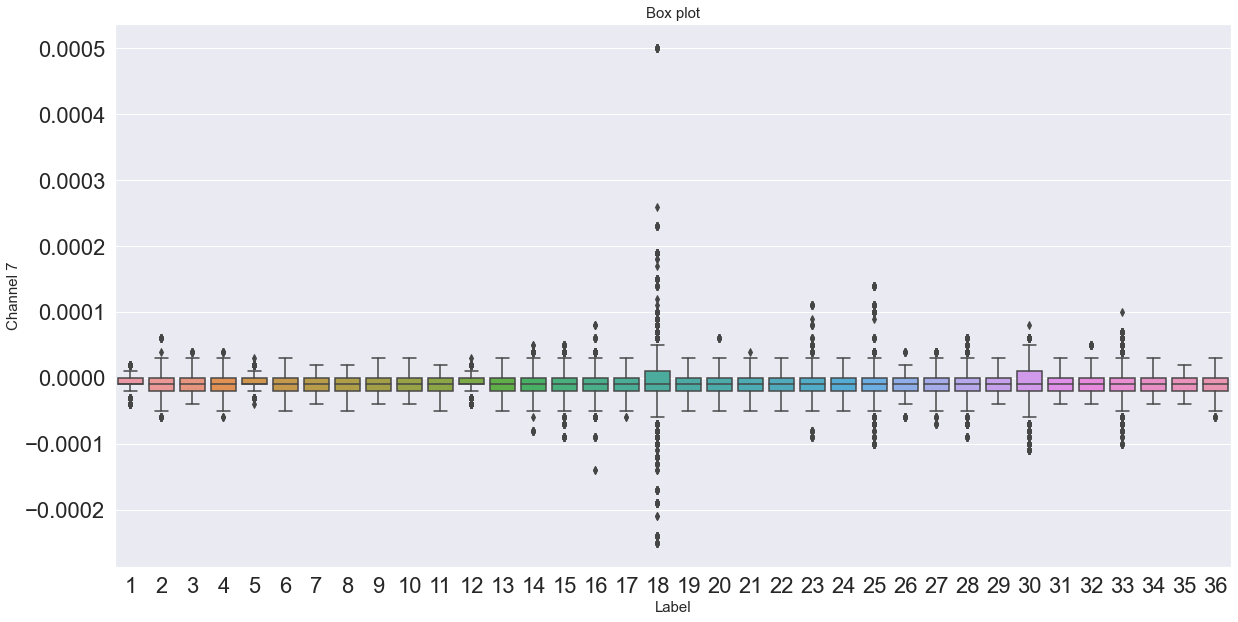

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel7',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 7',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

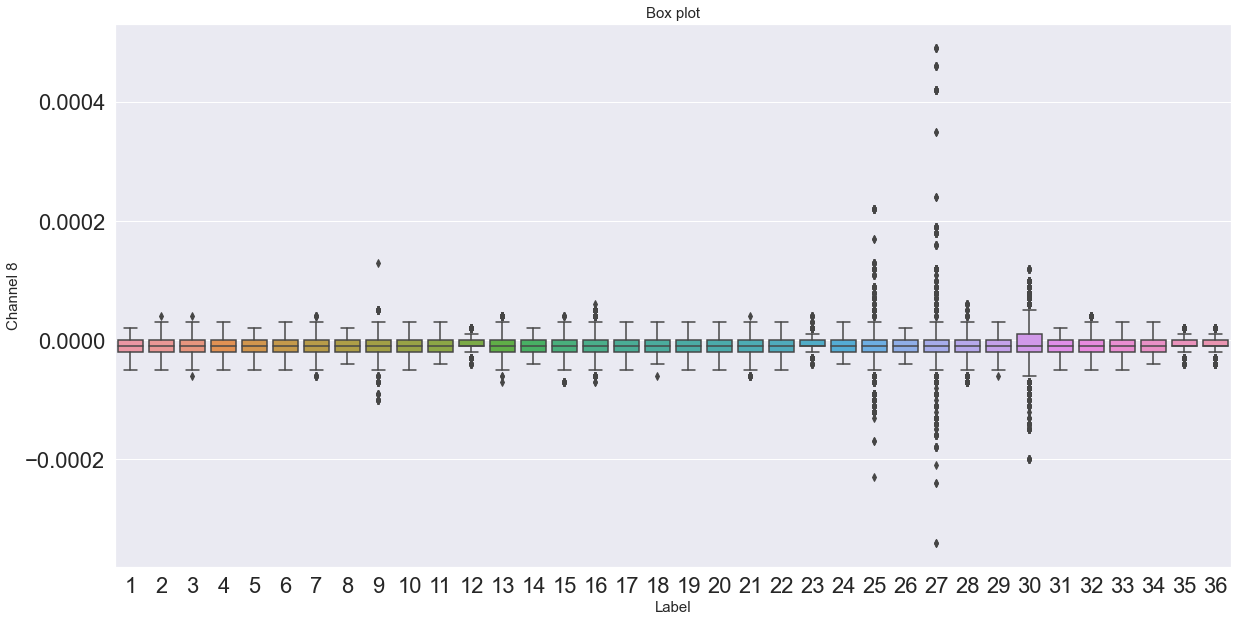

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel8',data=class1)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 8',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

##### Boxplots of Class 2

In [30]:
class2=df[df['class']==2] # matrix with the class=2

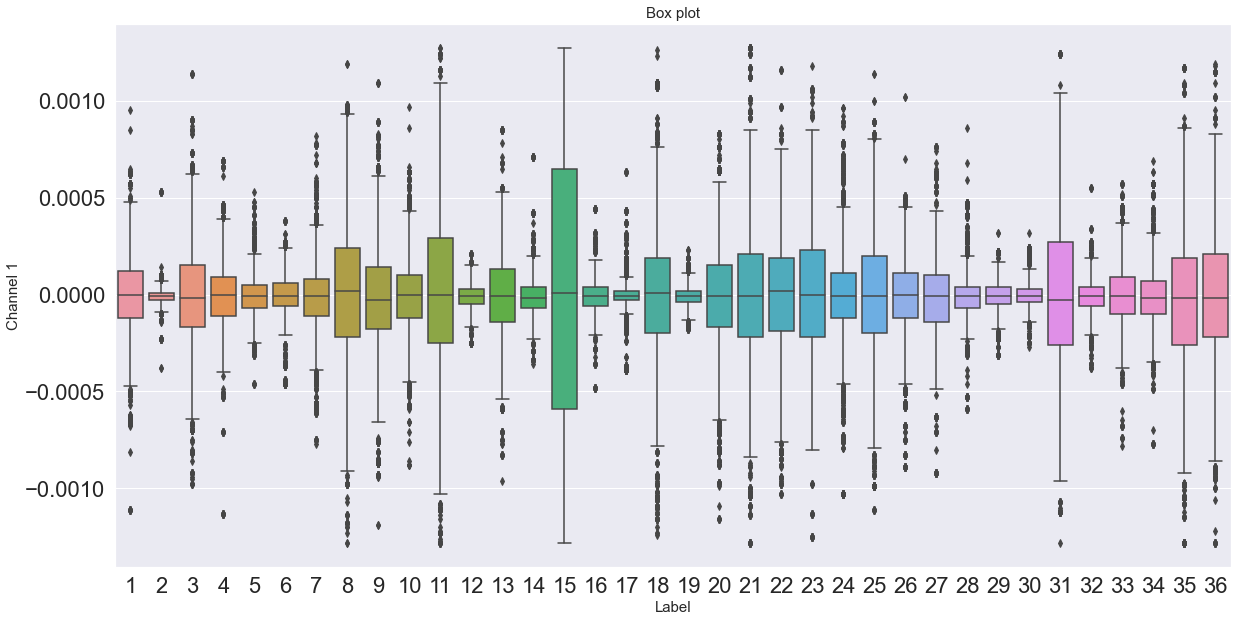

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel1',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 1',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

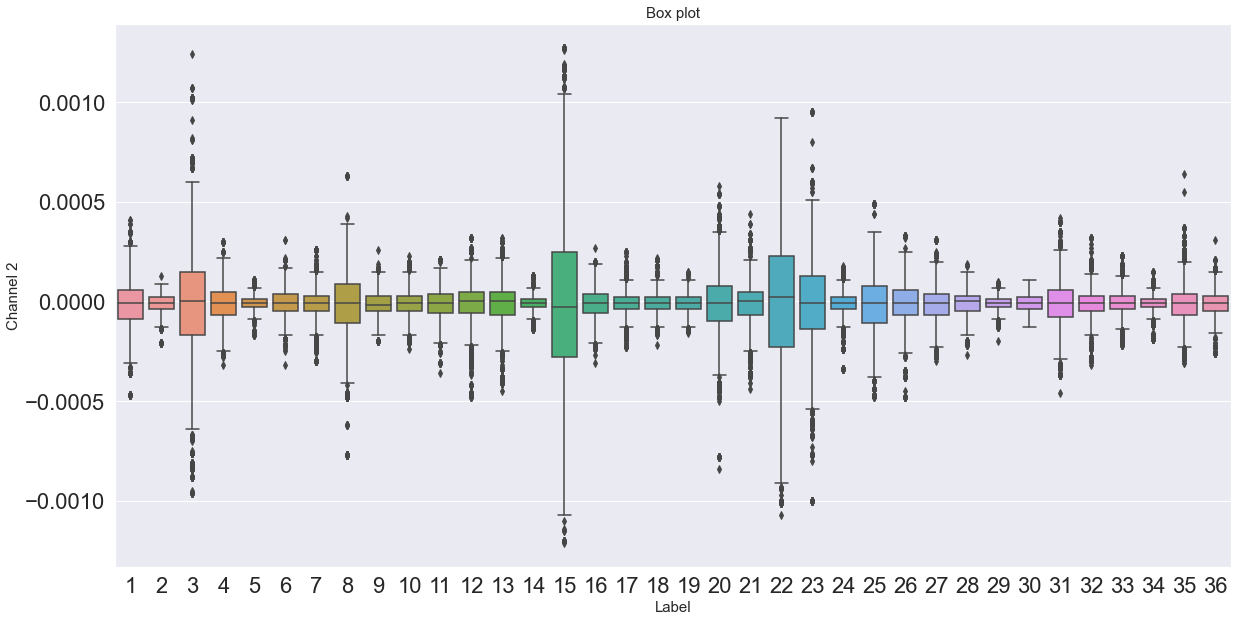

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel2',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 2',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

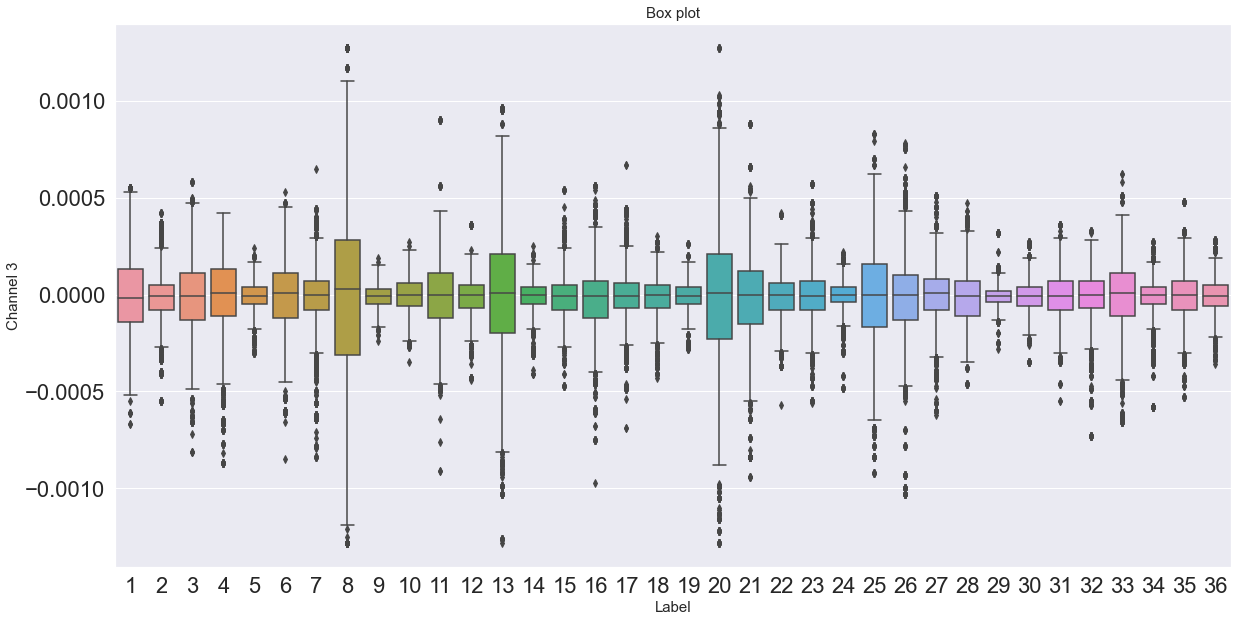

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel3',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 3',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

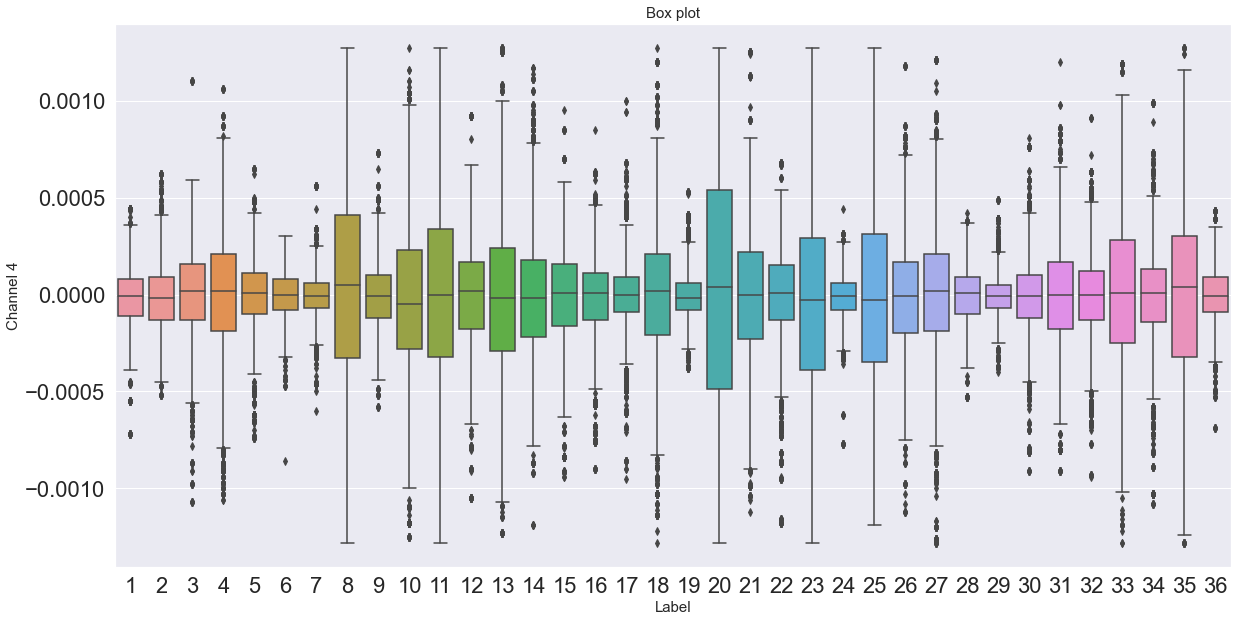

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel4',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 4',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

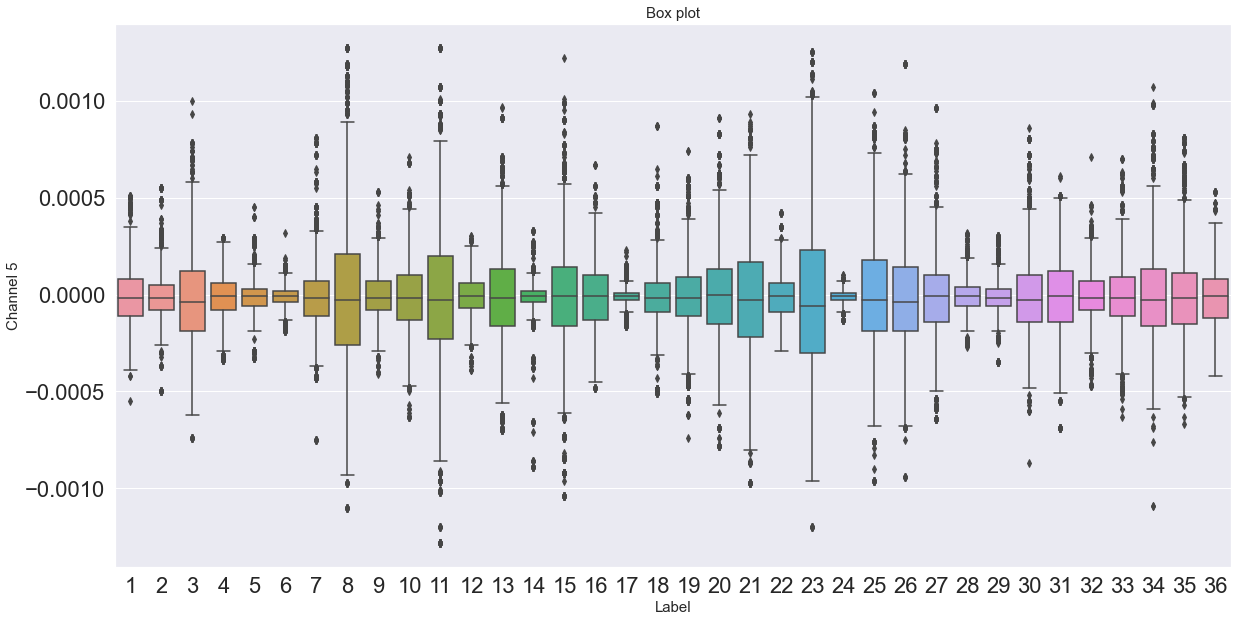

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel5',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 5',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

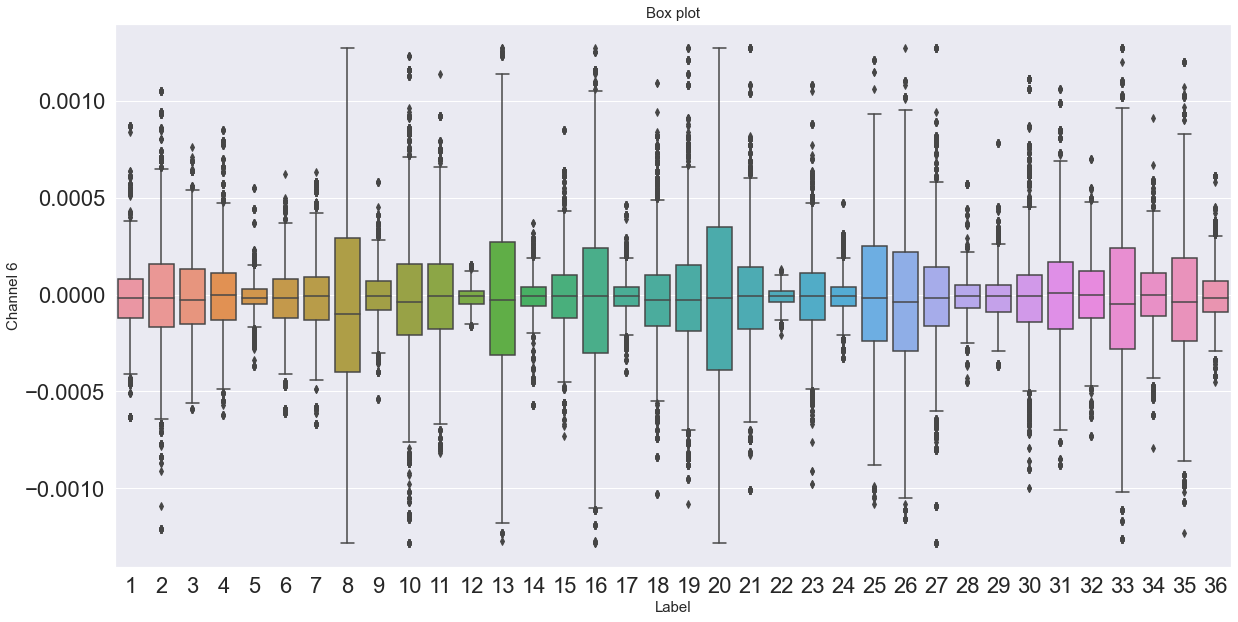

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel6',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 6',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

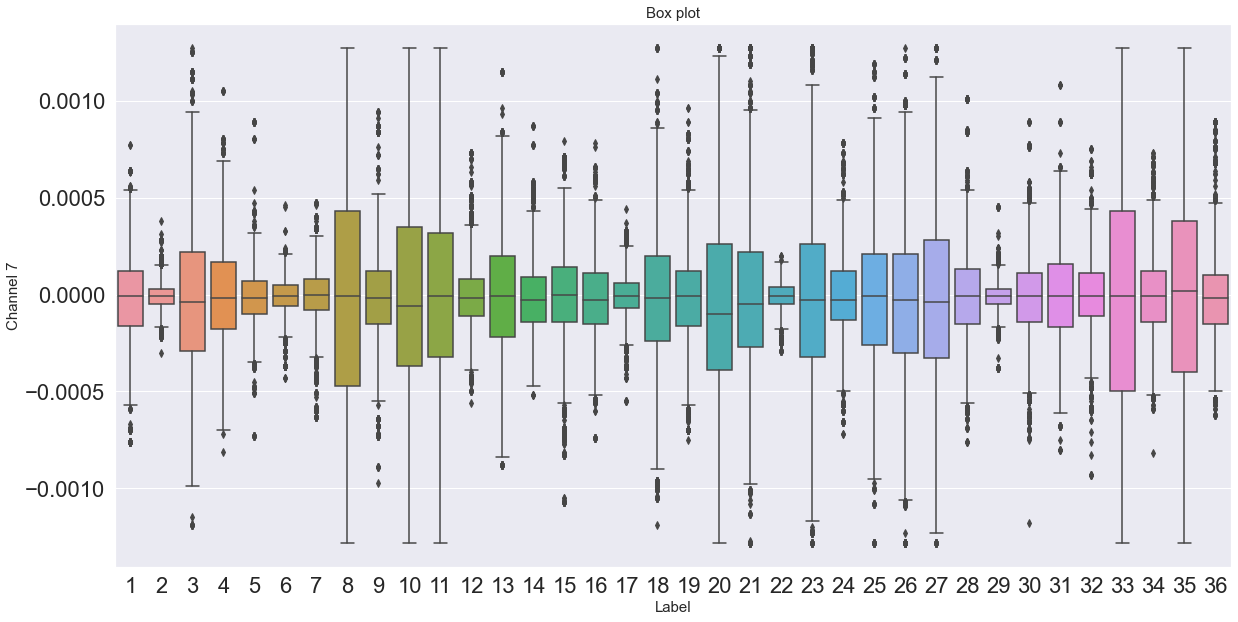

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel7',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 7',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

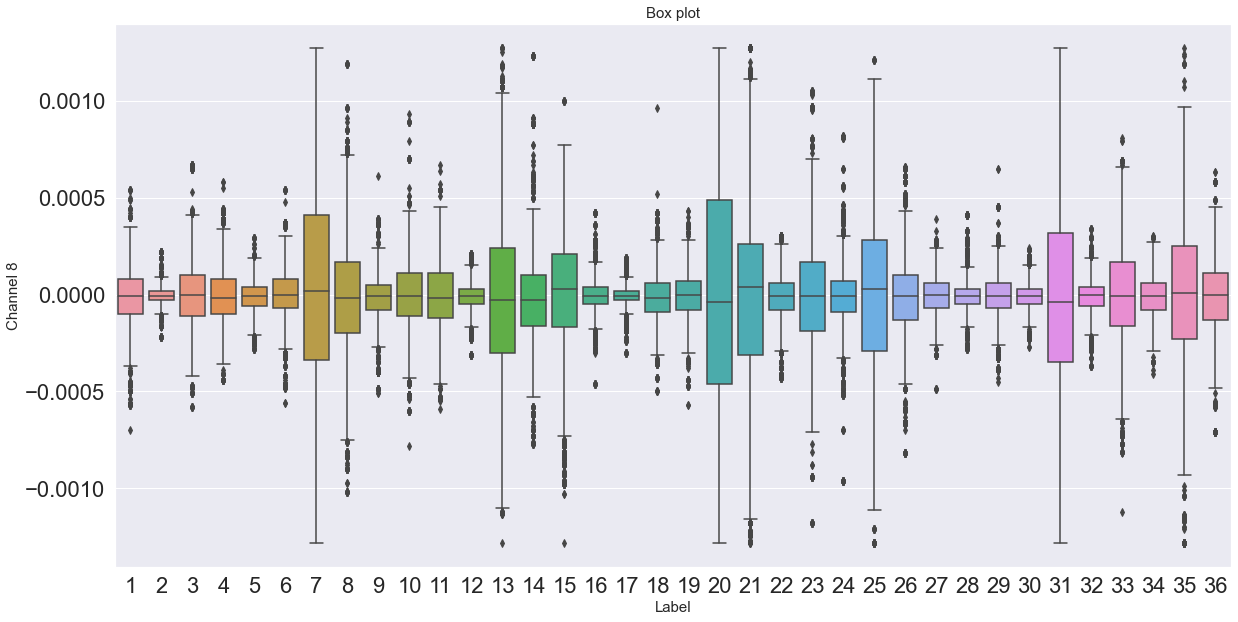

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel8',data=class2)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 8',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

##### Boxplots of Class 3

In [39]:
class3=df[df['class']==3] # matrix with the class=3

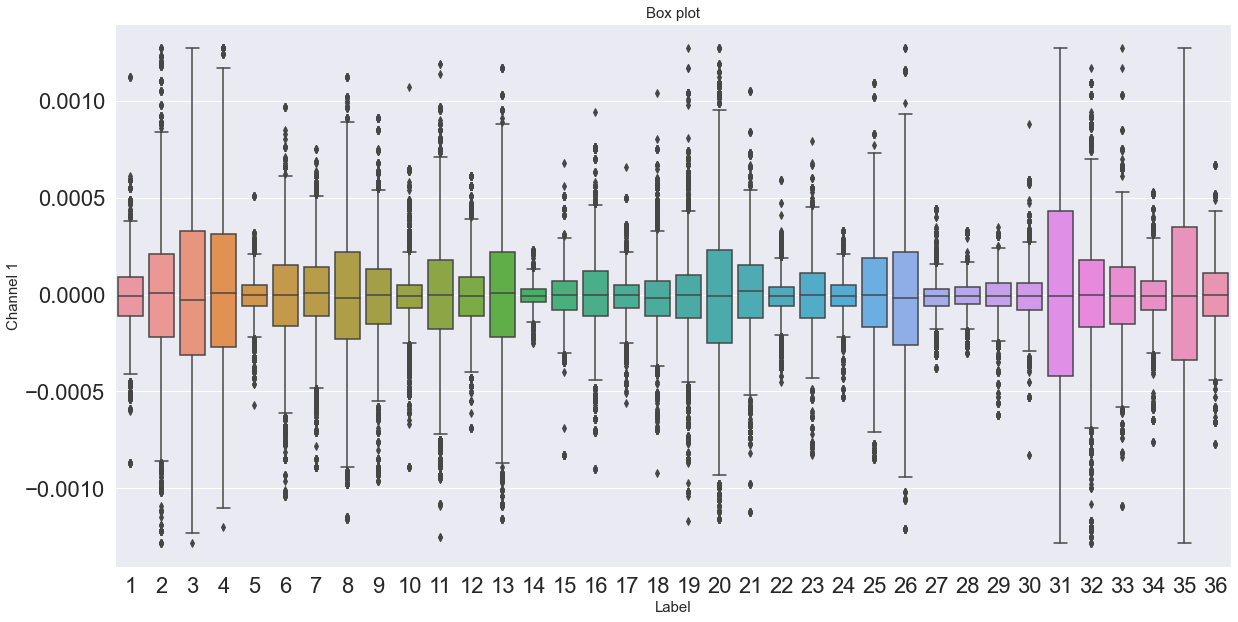

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel1',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 1',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

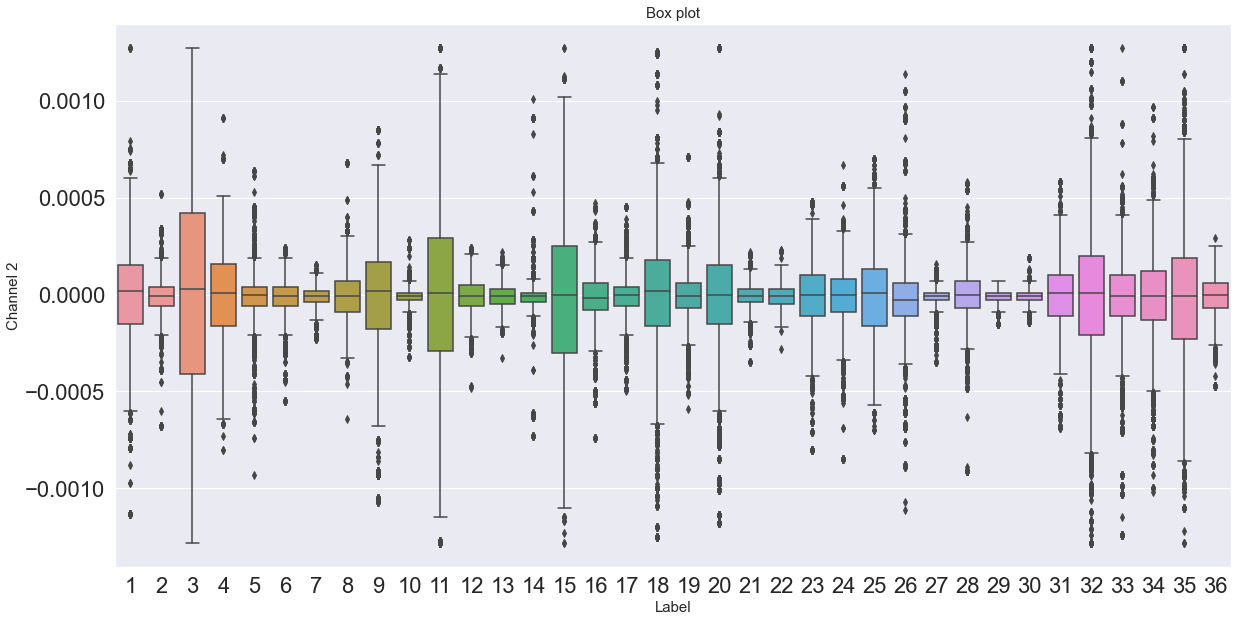

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel2',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 2',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

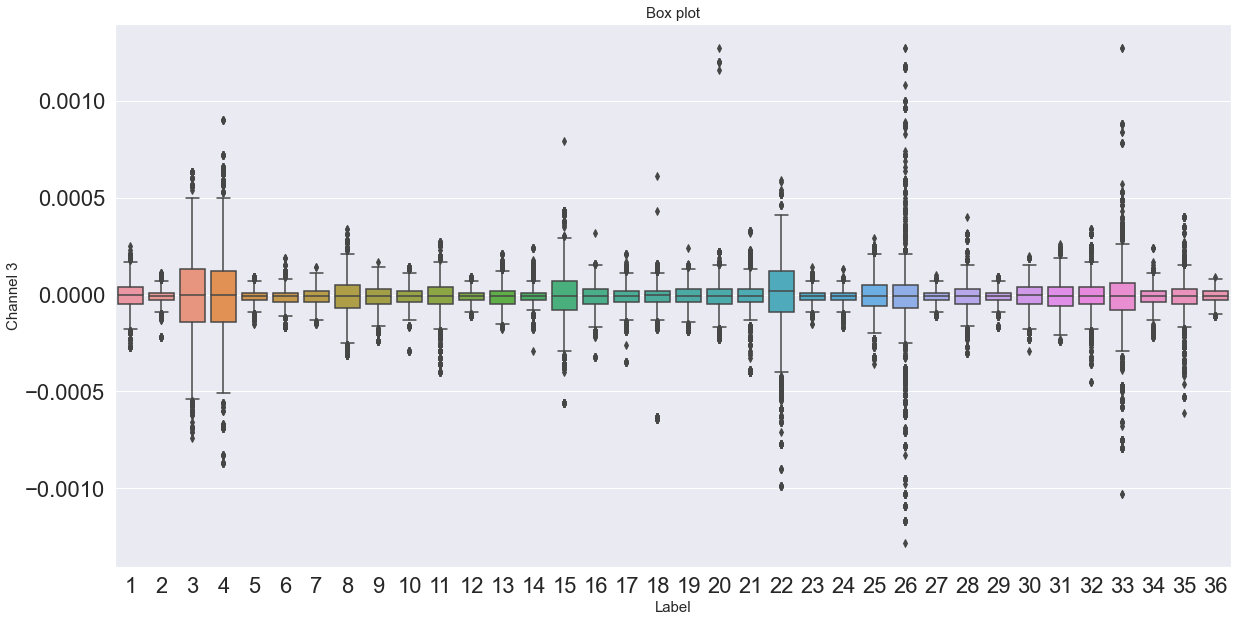

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel3',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 3',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

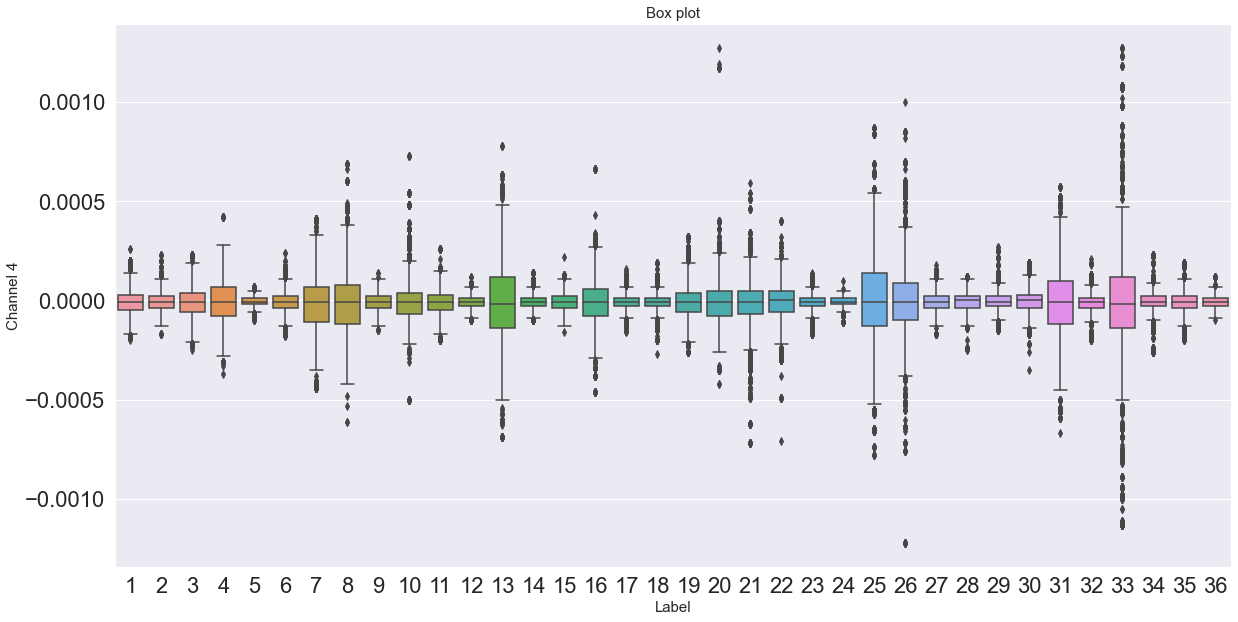

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel4',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 4',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

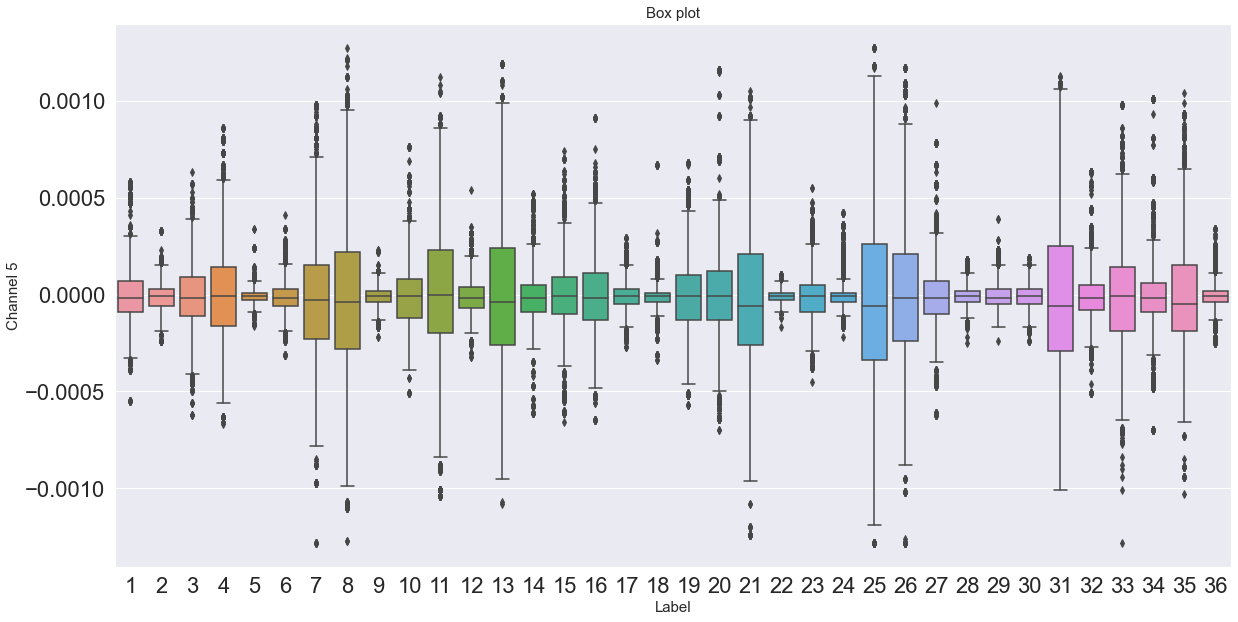

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel5',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 5',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

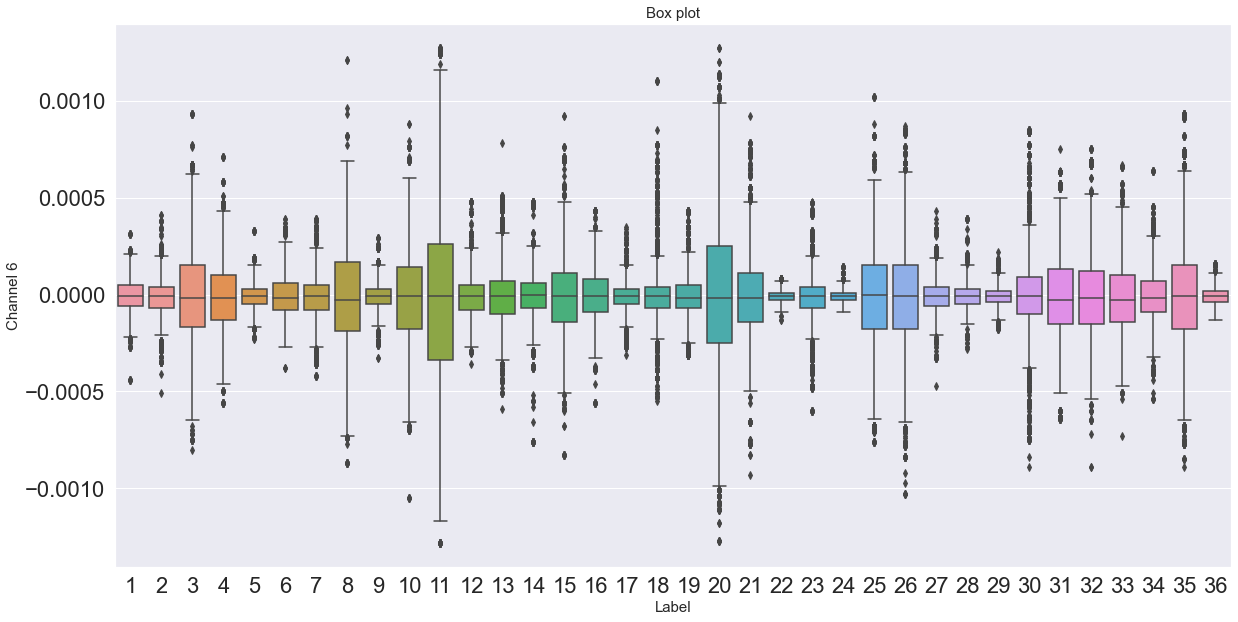

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel6',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 6',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

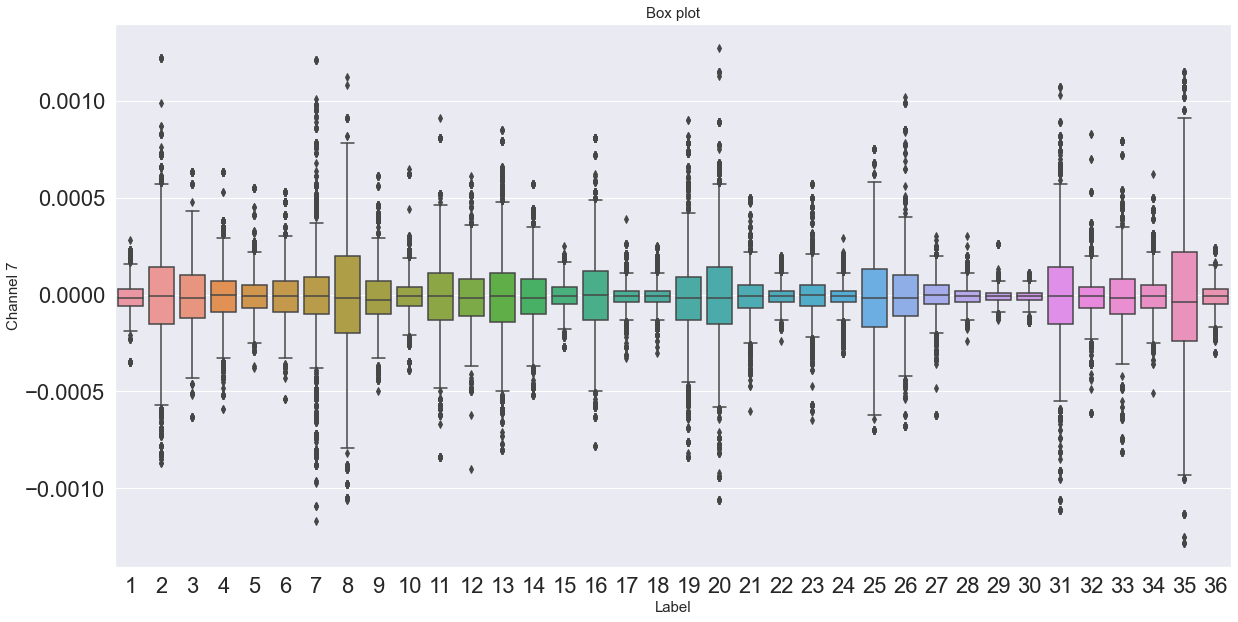

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel7',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 7',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

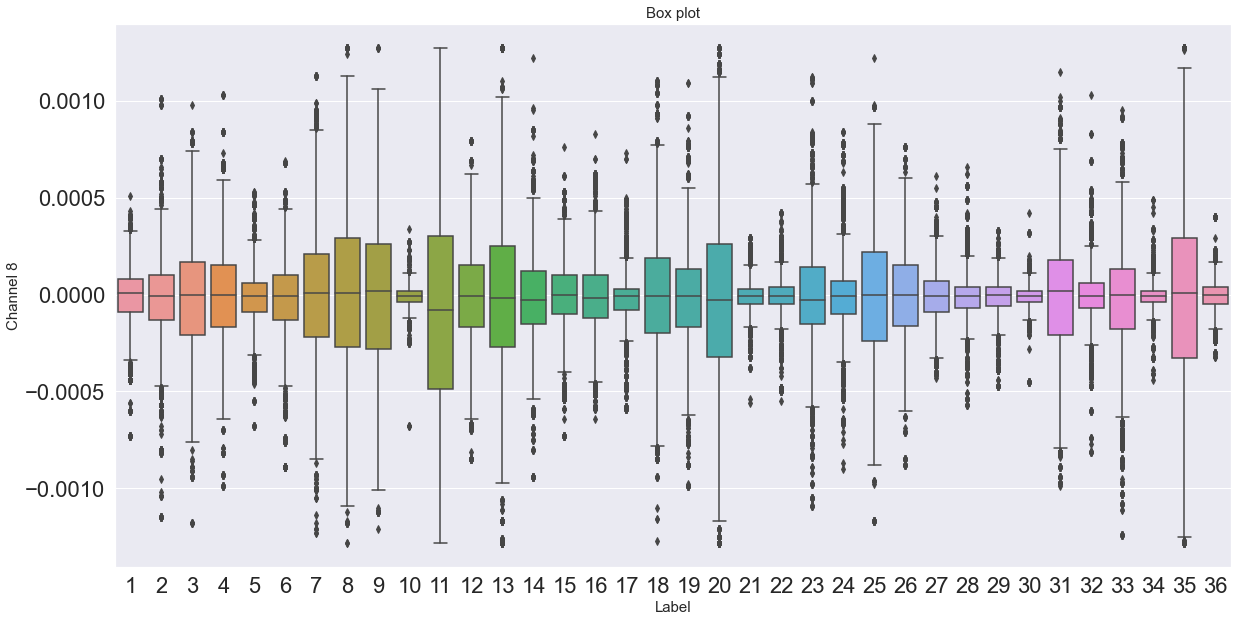

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel8',data=class3)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 8',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

##### Boxplots of Class 4

In [48]:
class4=df[df['class']==4] # matrix with the class=4

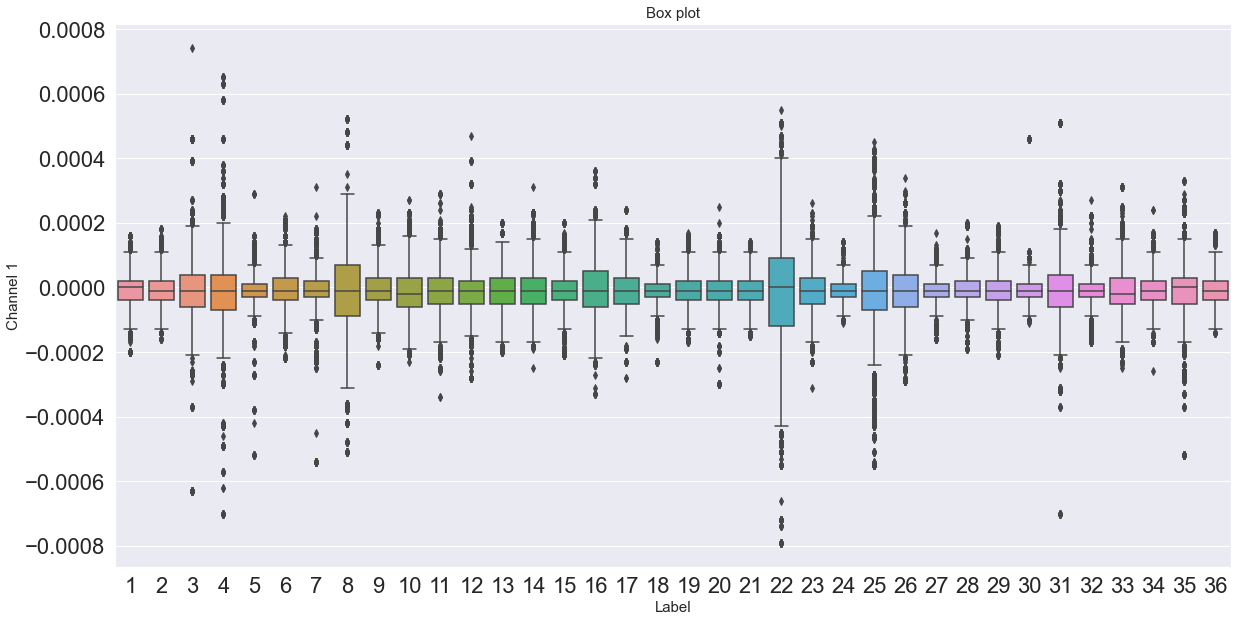

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel1',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 1',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

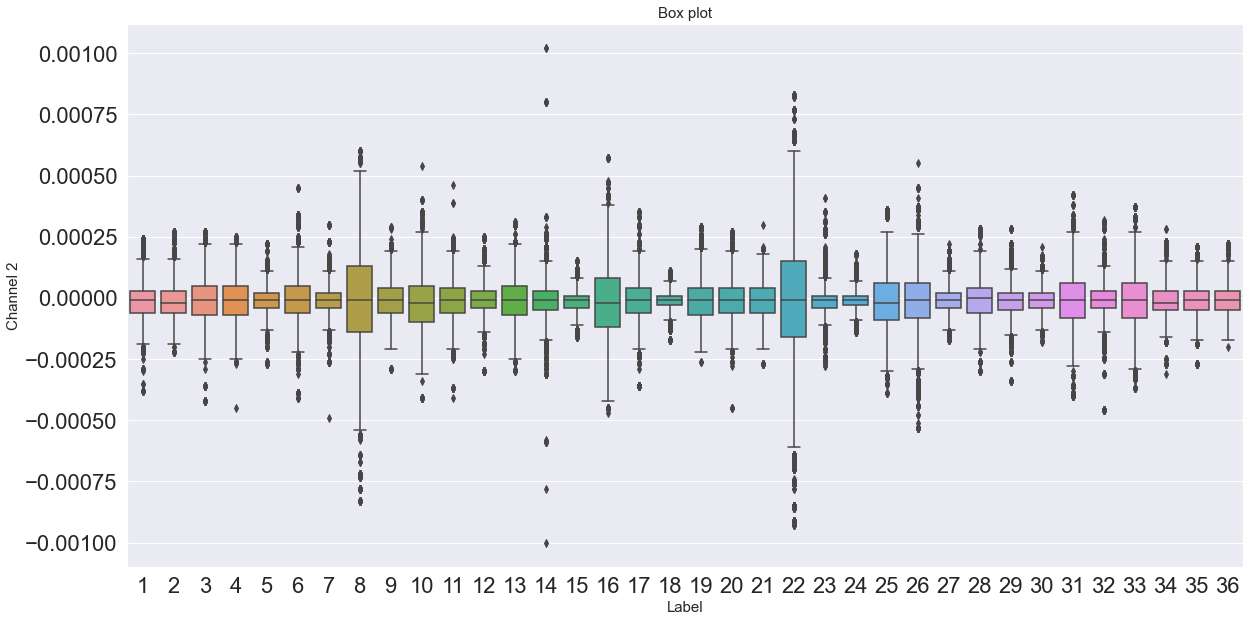

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel2',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 2',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

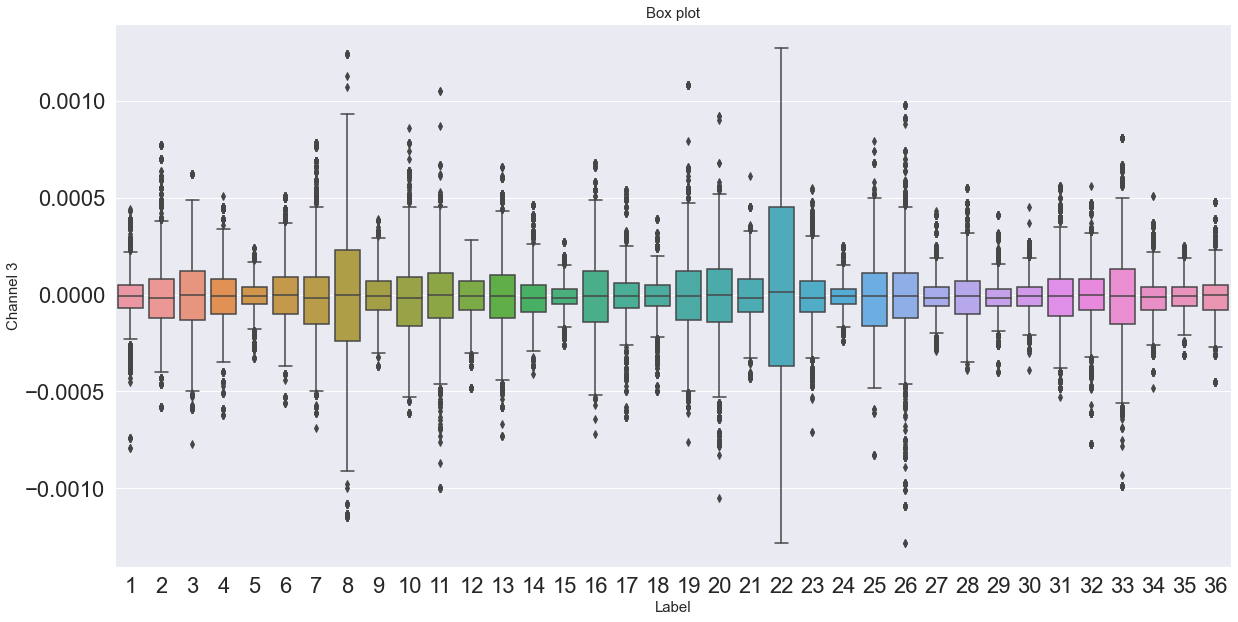

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel3',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 3',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

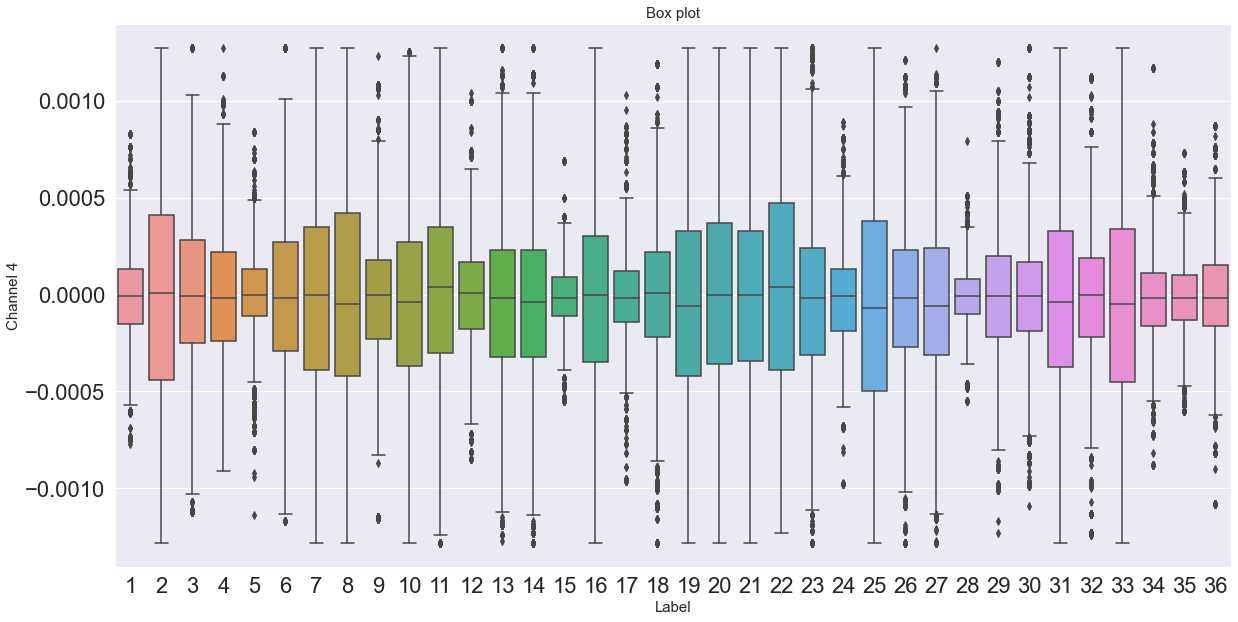

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel4',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 4',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

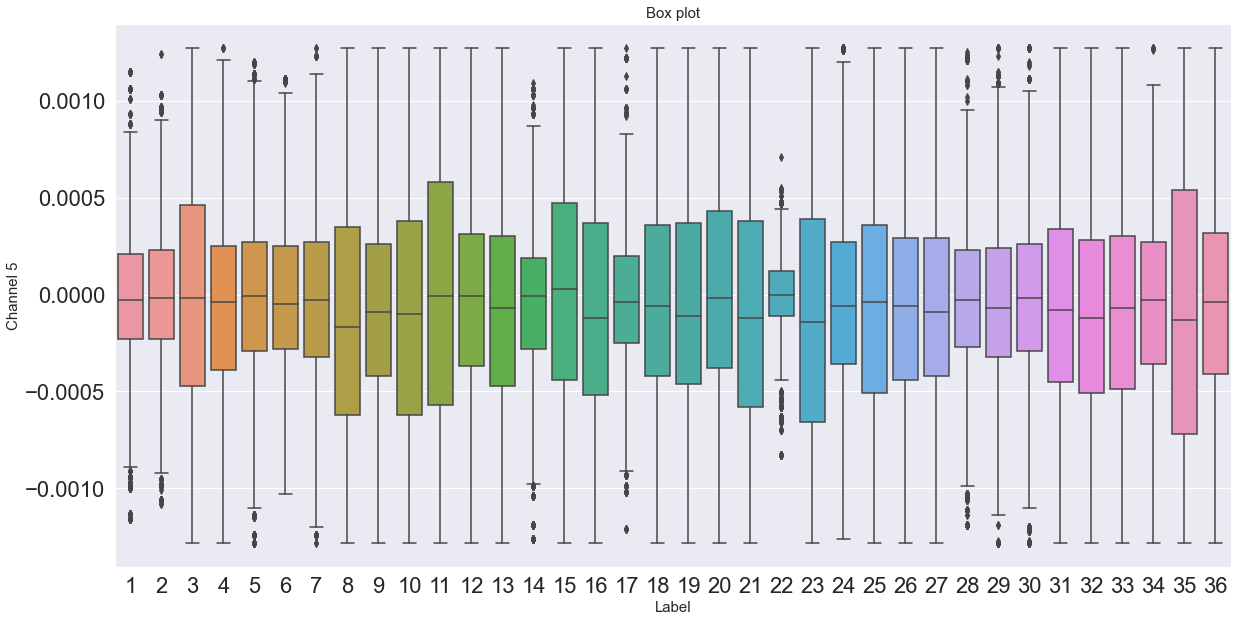

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel5',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 5',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

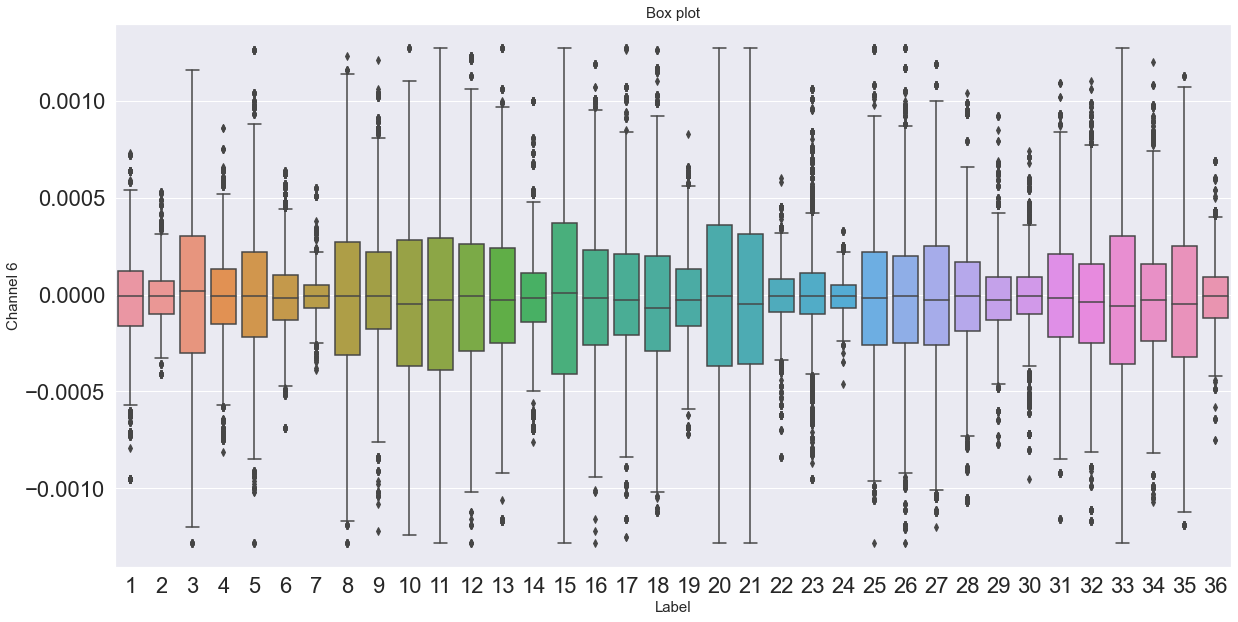

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel6',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 6',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

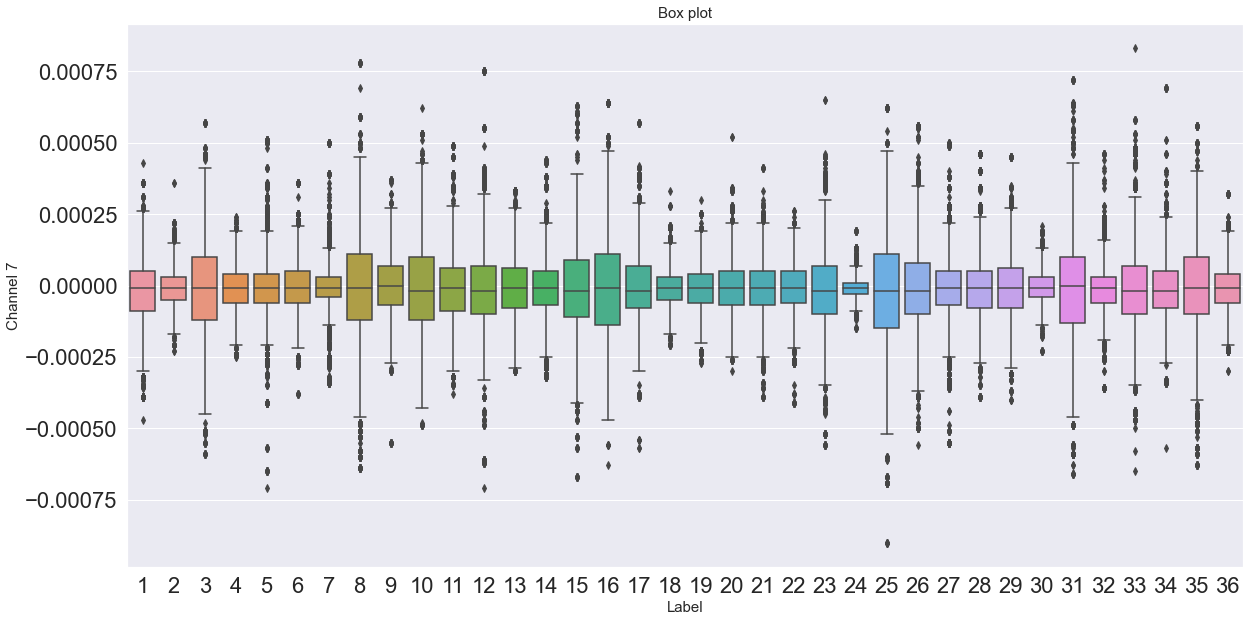

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel7',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 7',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

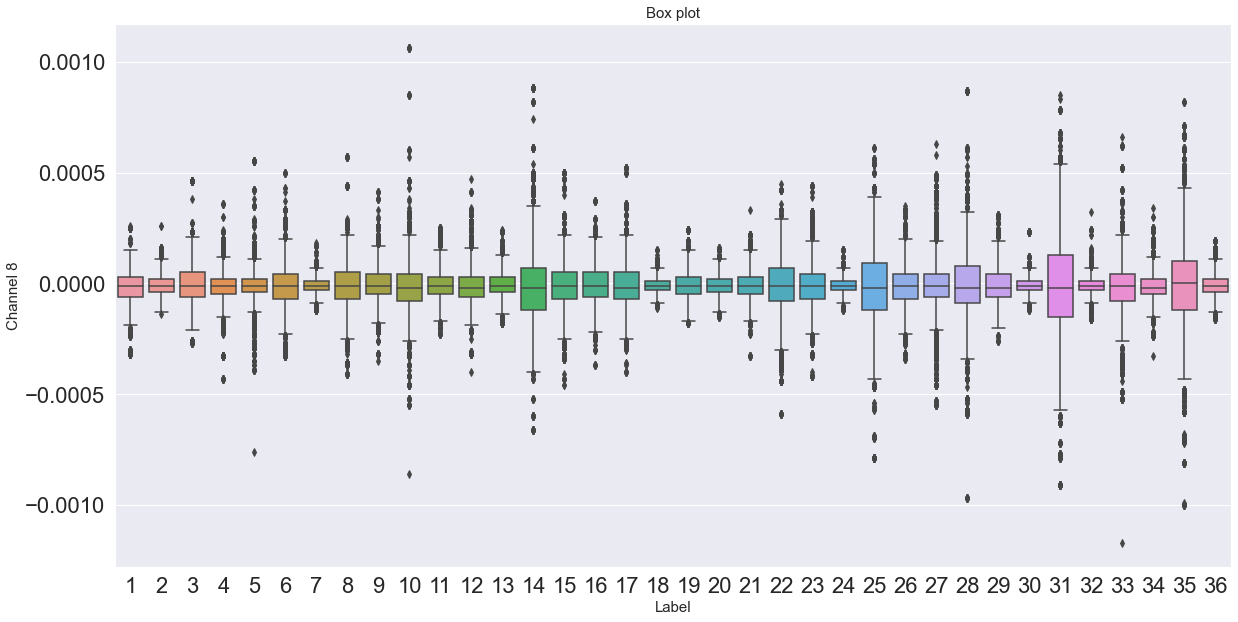

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel8',data=class4)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 8',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

##### Boxplots of Class 5

In [57]:
class5=df[df['class']==5] # matrix with the class=5

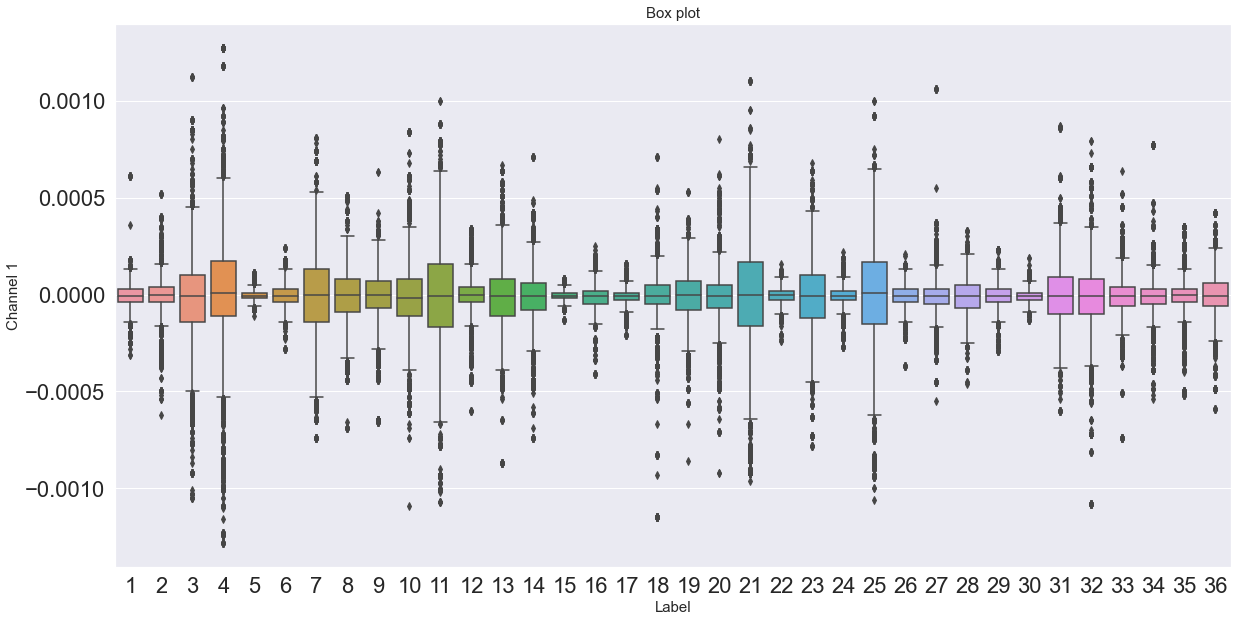

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel1',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 1',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

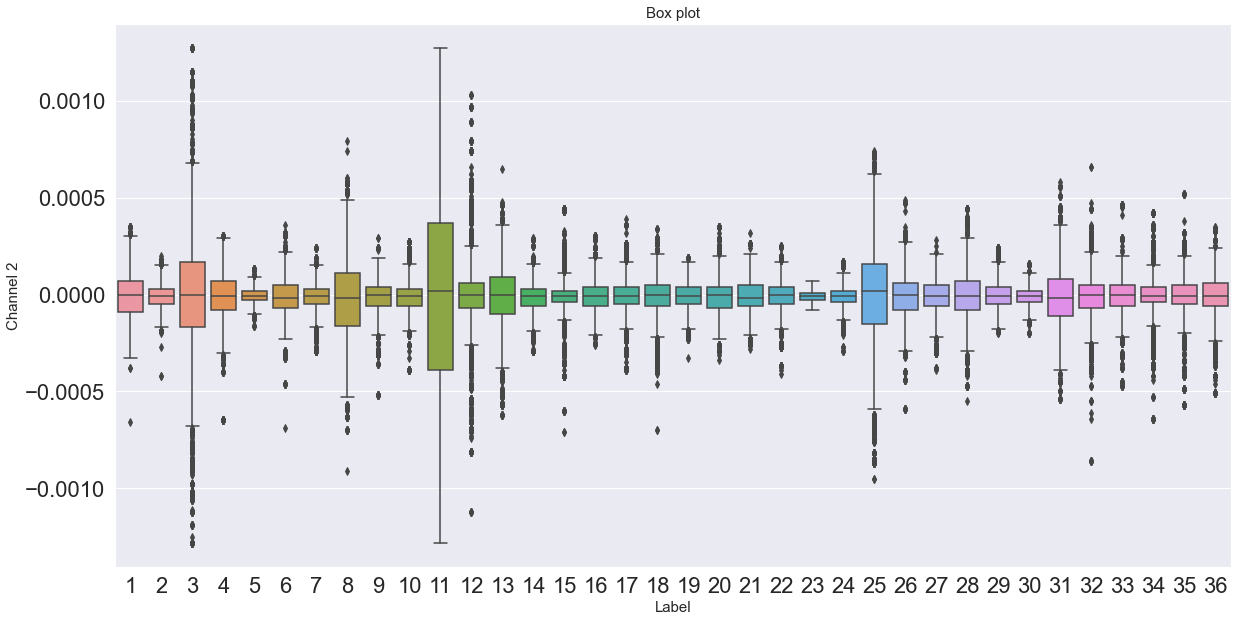

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel2',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 2',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

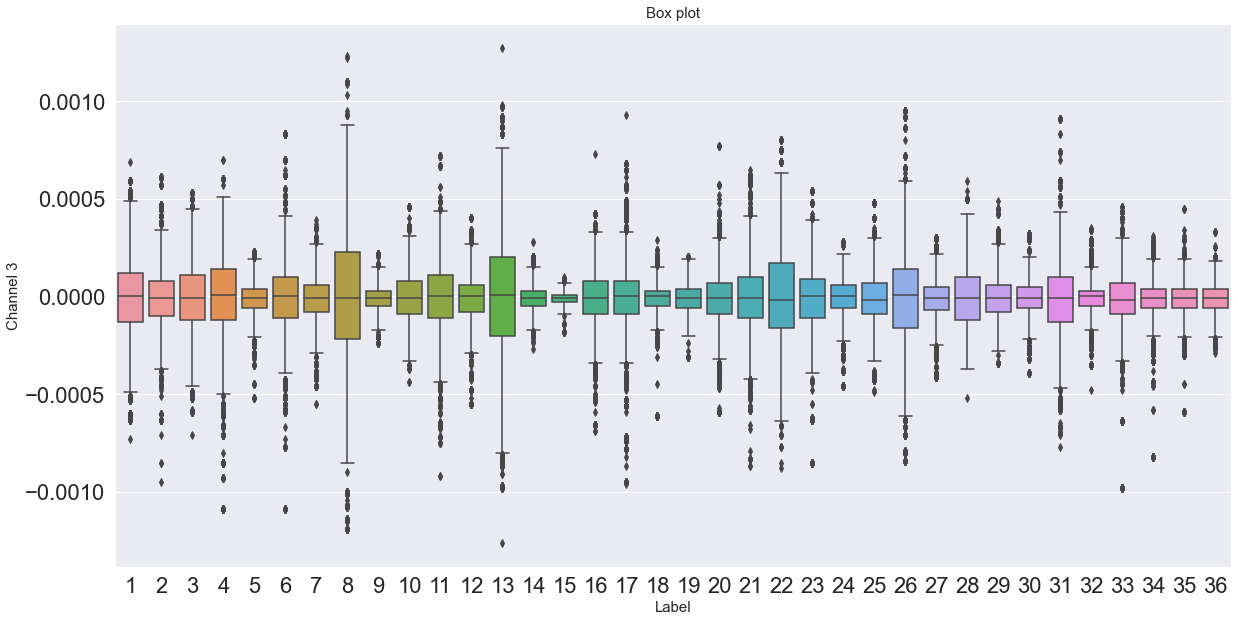

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel3',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 3',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

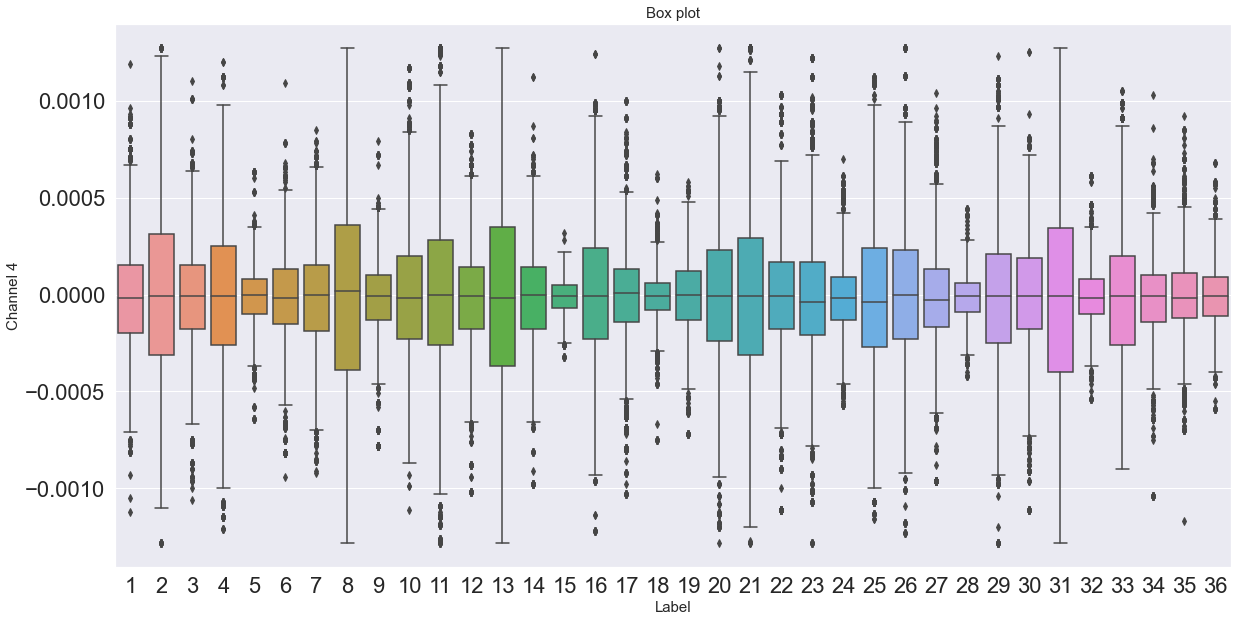

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel4',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 4',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

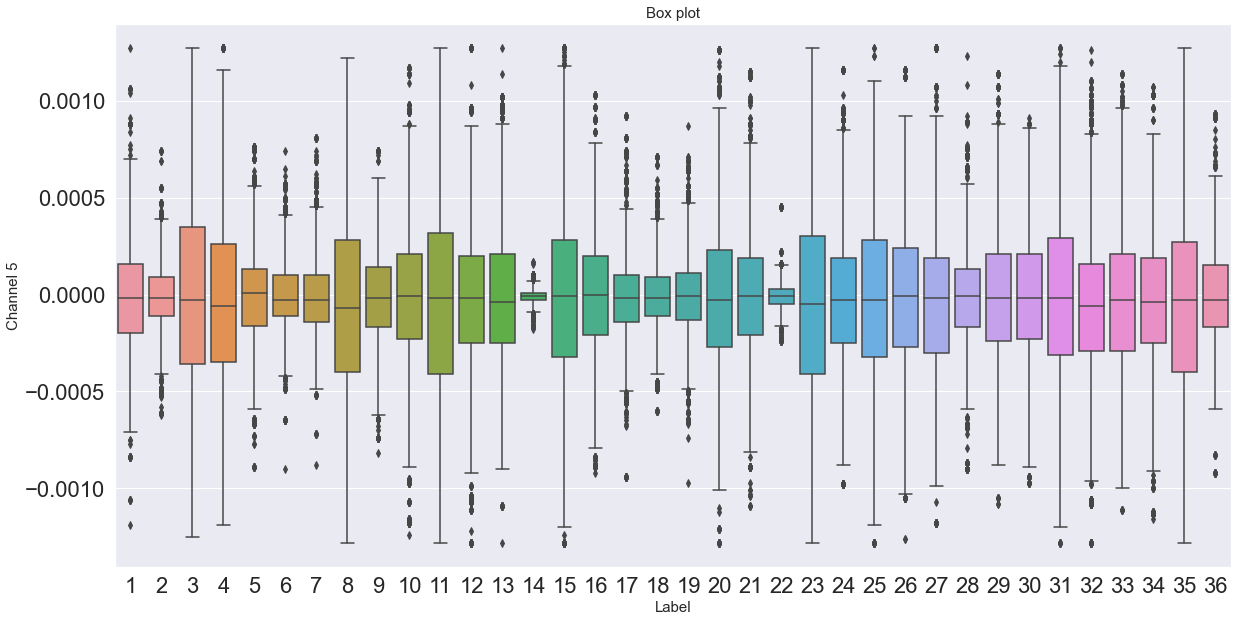

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel5',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 5',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

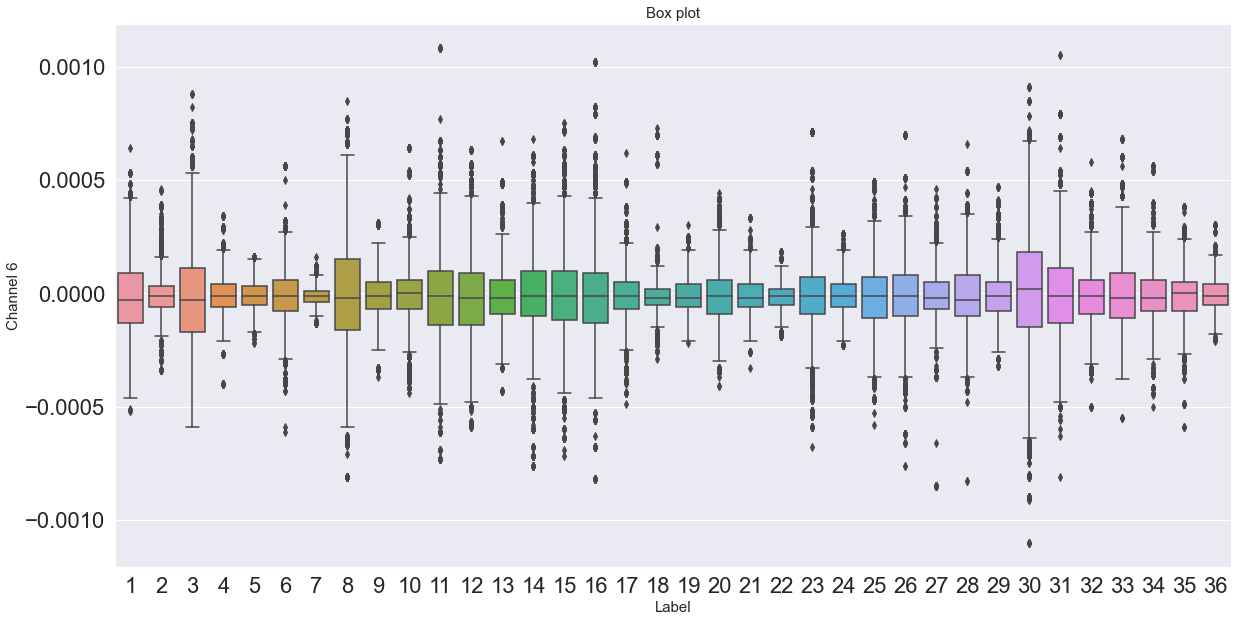

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel6',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 6',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

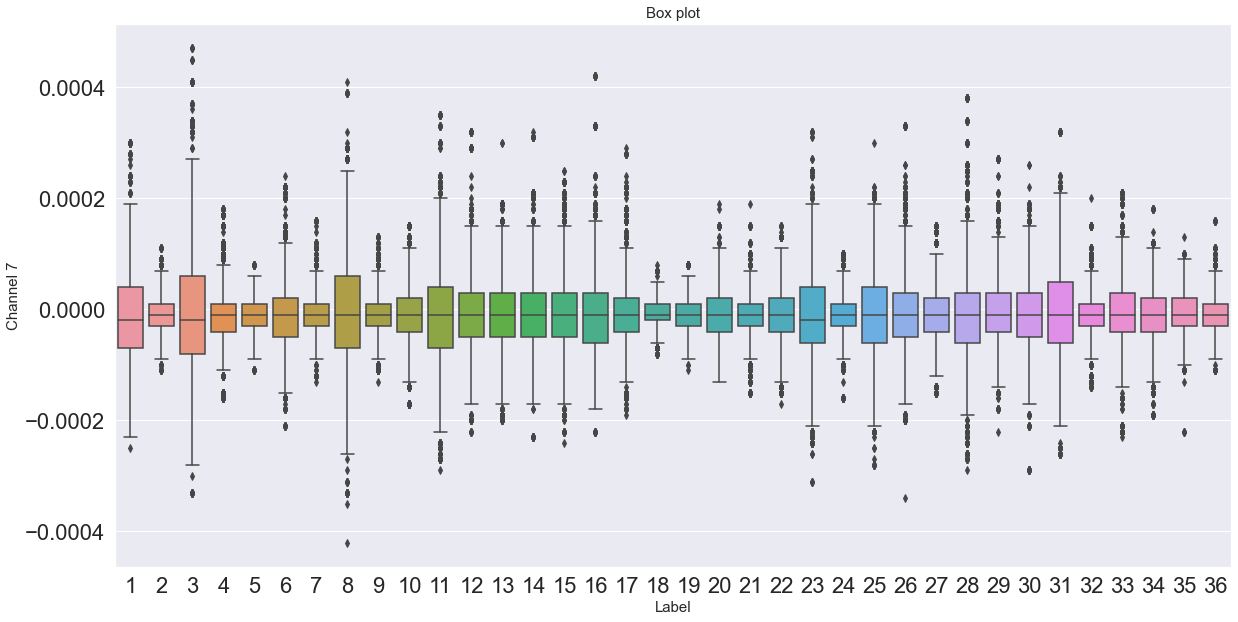

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel7',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 7',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

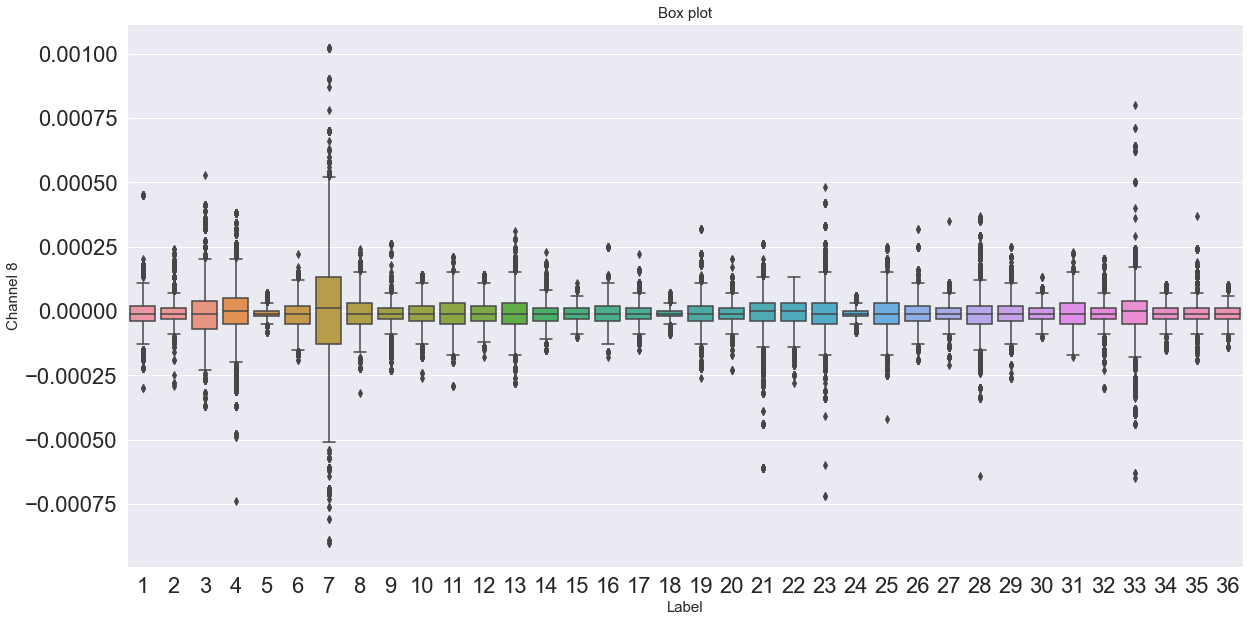

In [65]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel8',data=class5)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 8',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

##### Boxplots of Class 6

In [66]:
class6=df[df['class']==3] # matrix with the class=6

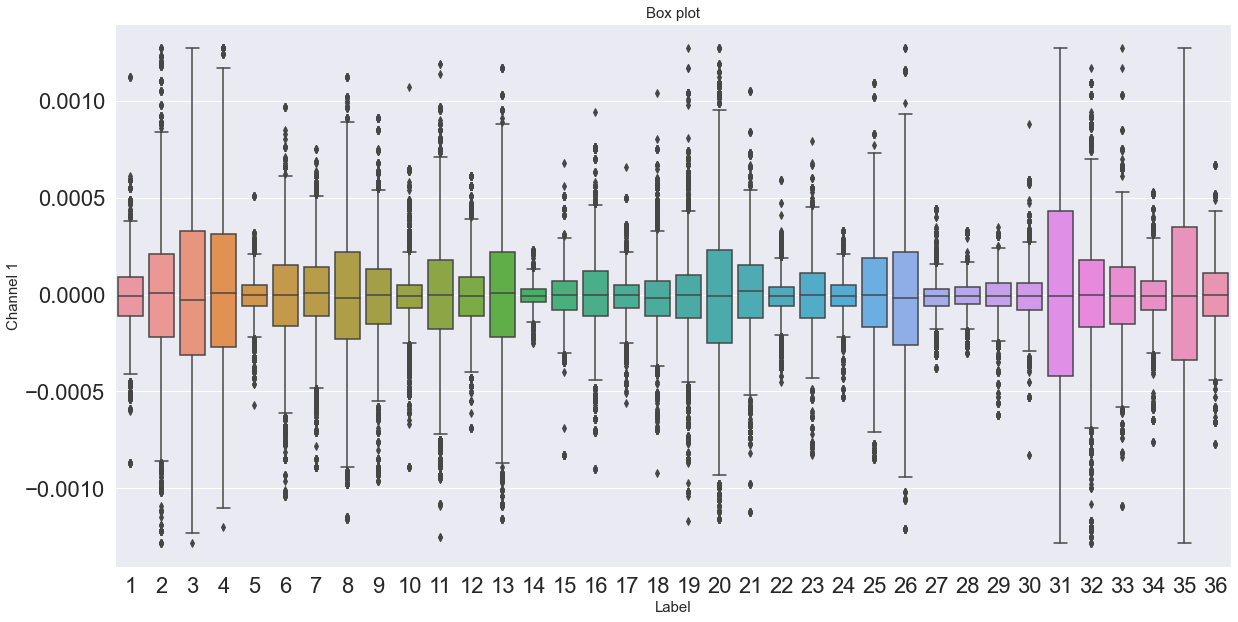

In [67]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel1',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 1',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

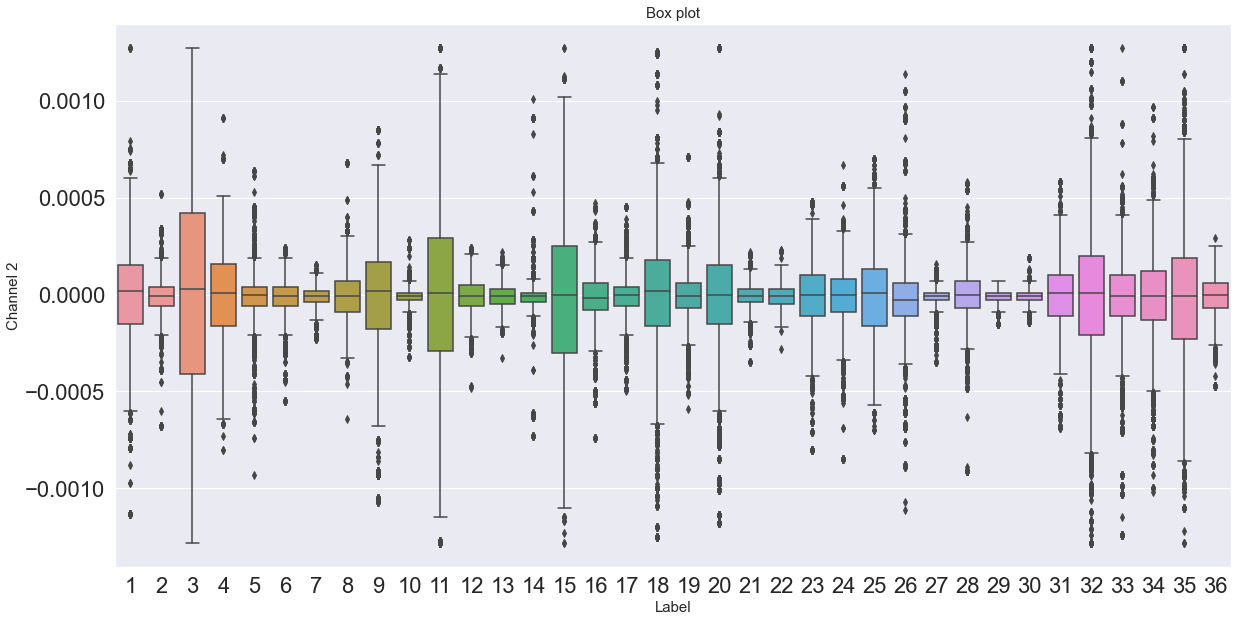

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel2',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 2',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

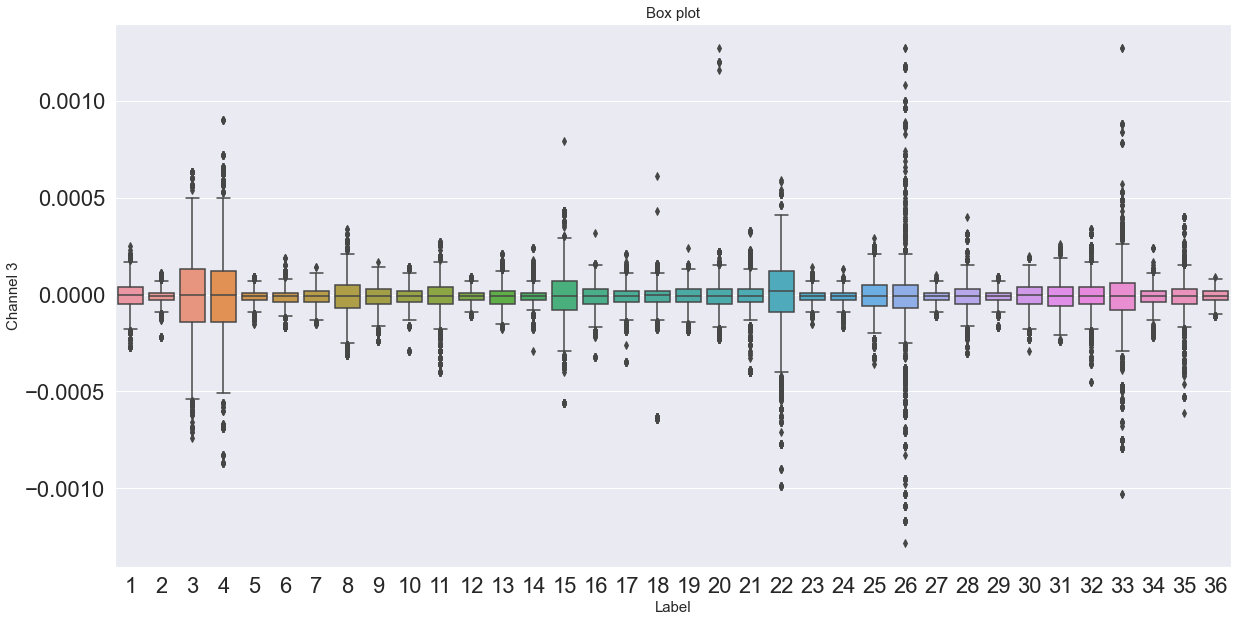

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel3',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 3',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

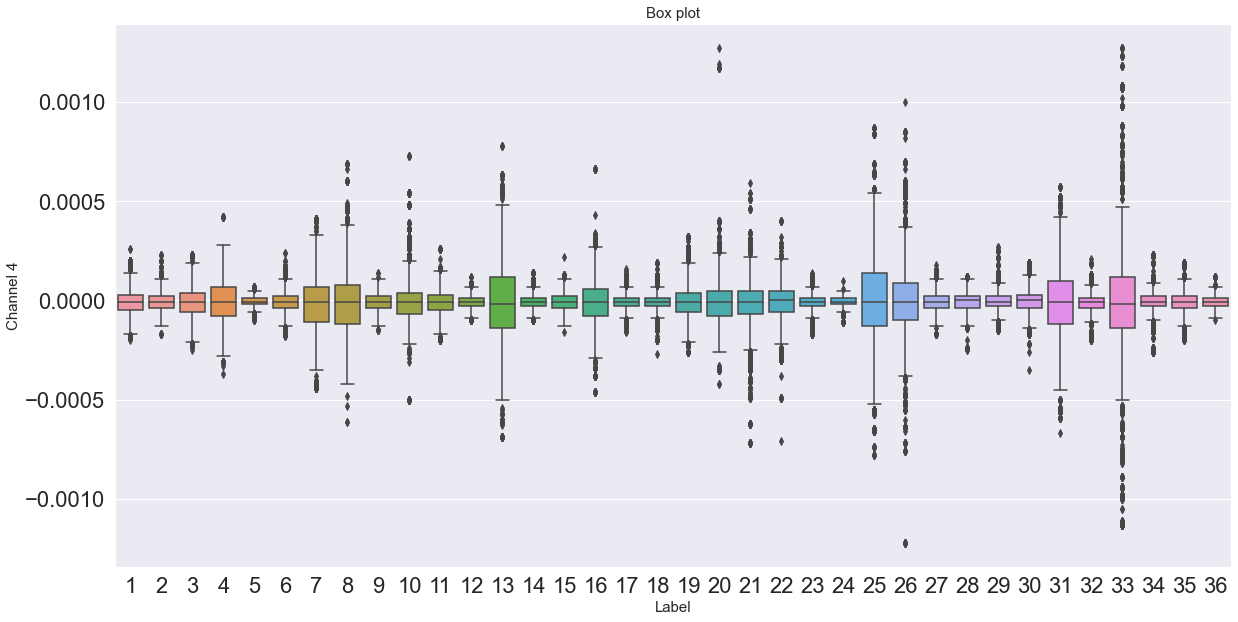

In [70]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel4',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 4',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

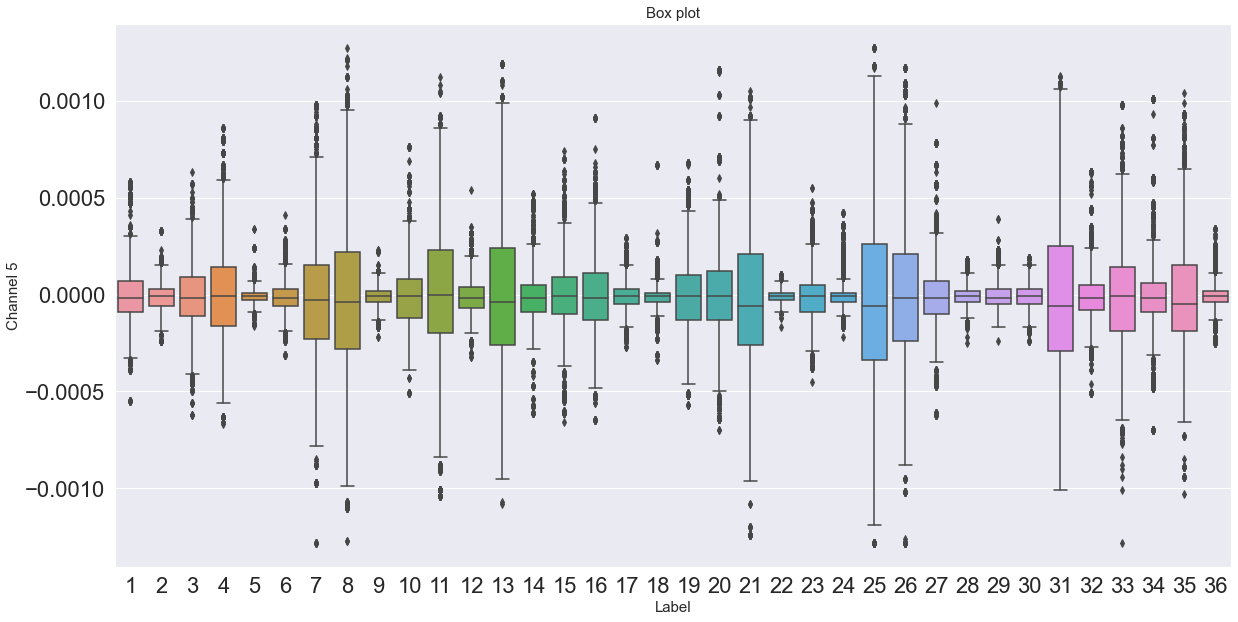

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel5',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 5',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

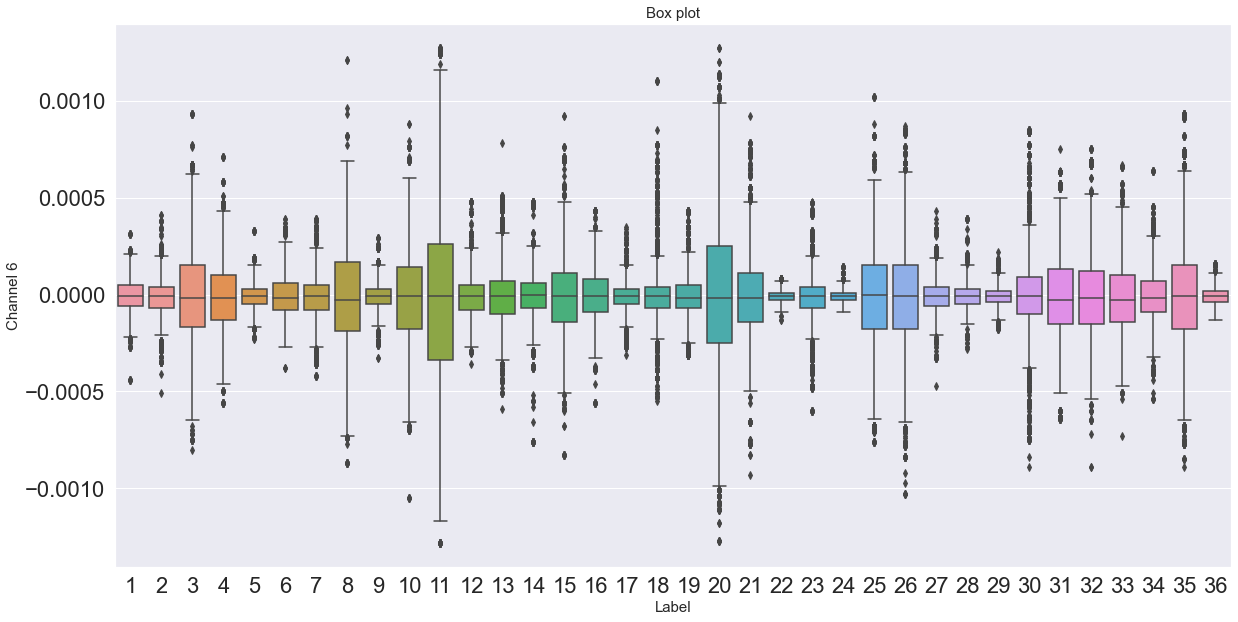

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel6',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 6',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

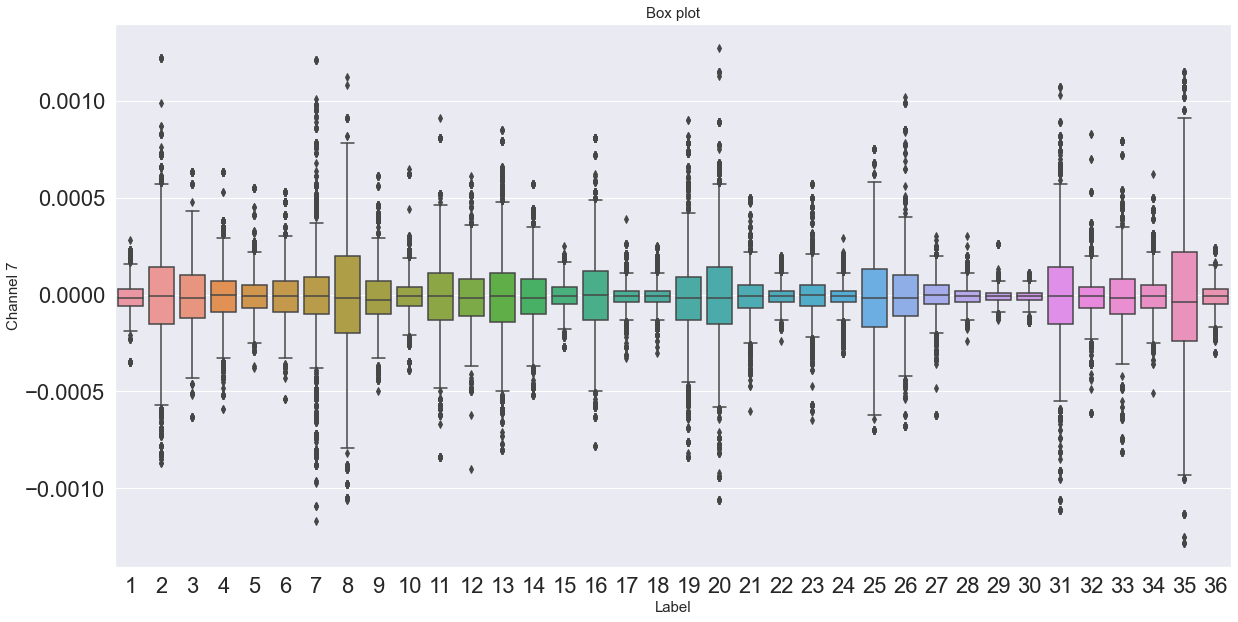

In [73]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel7',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 7',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

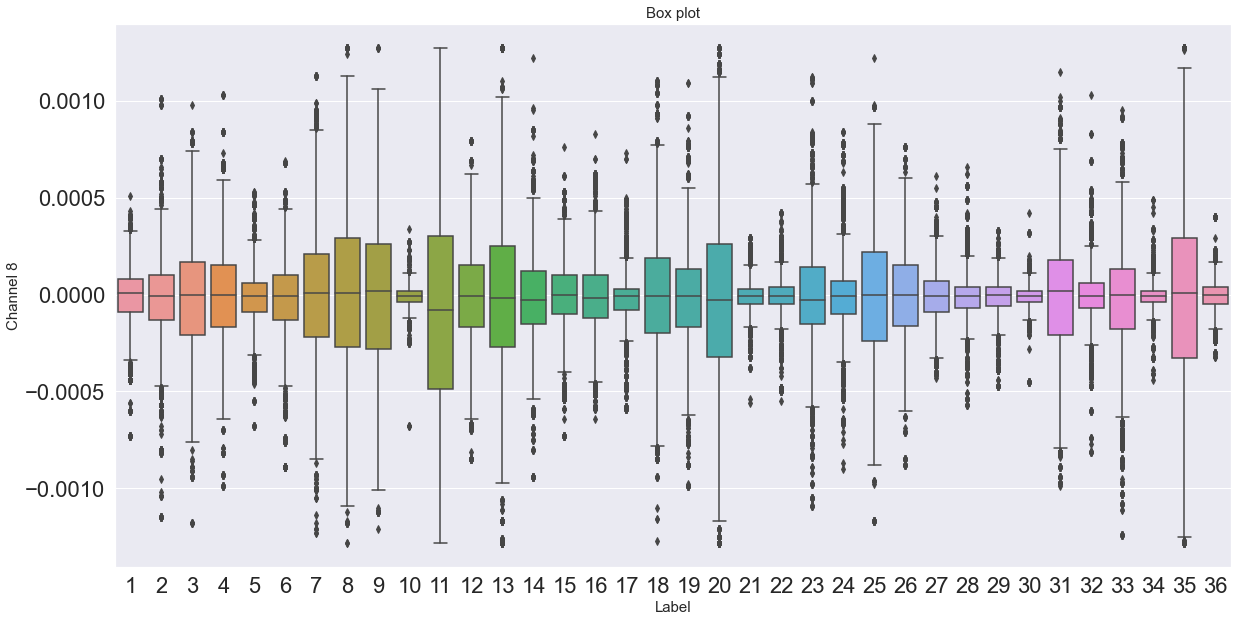

In [74]:
plt.figure(figsize=(20,10))
sns.boxplot(x='label',y='channel8',data=class6)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Channel 8',fontsize=15)
plt.title('Box plot',fontsize=15)
plt.show()

#### Data Analysis
>#####  Heatmaps

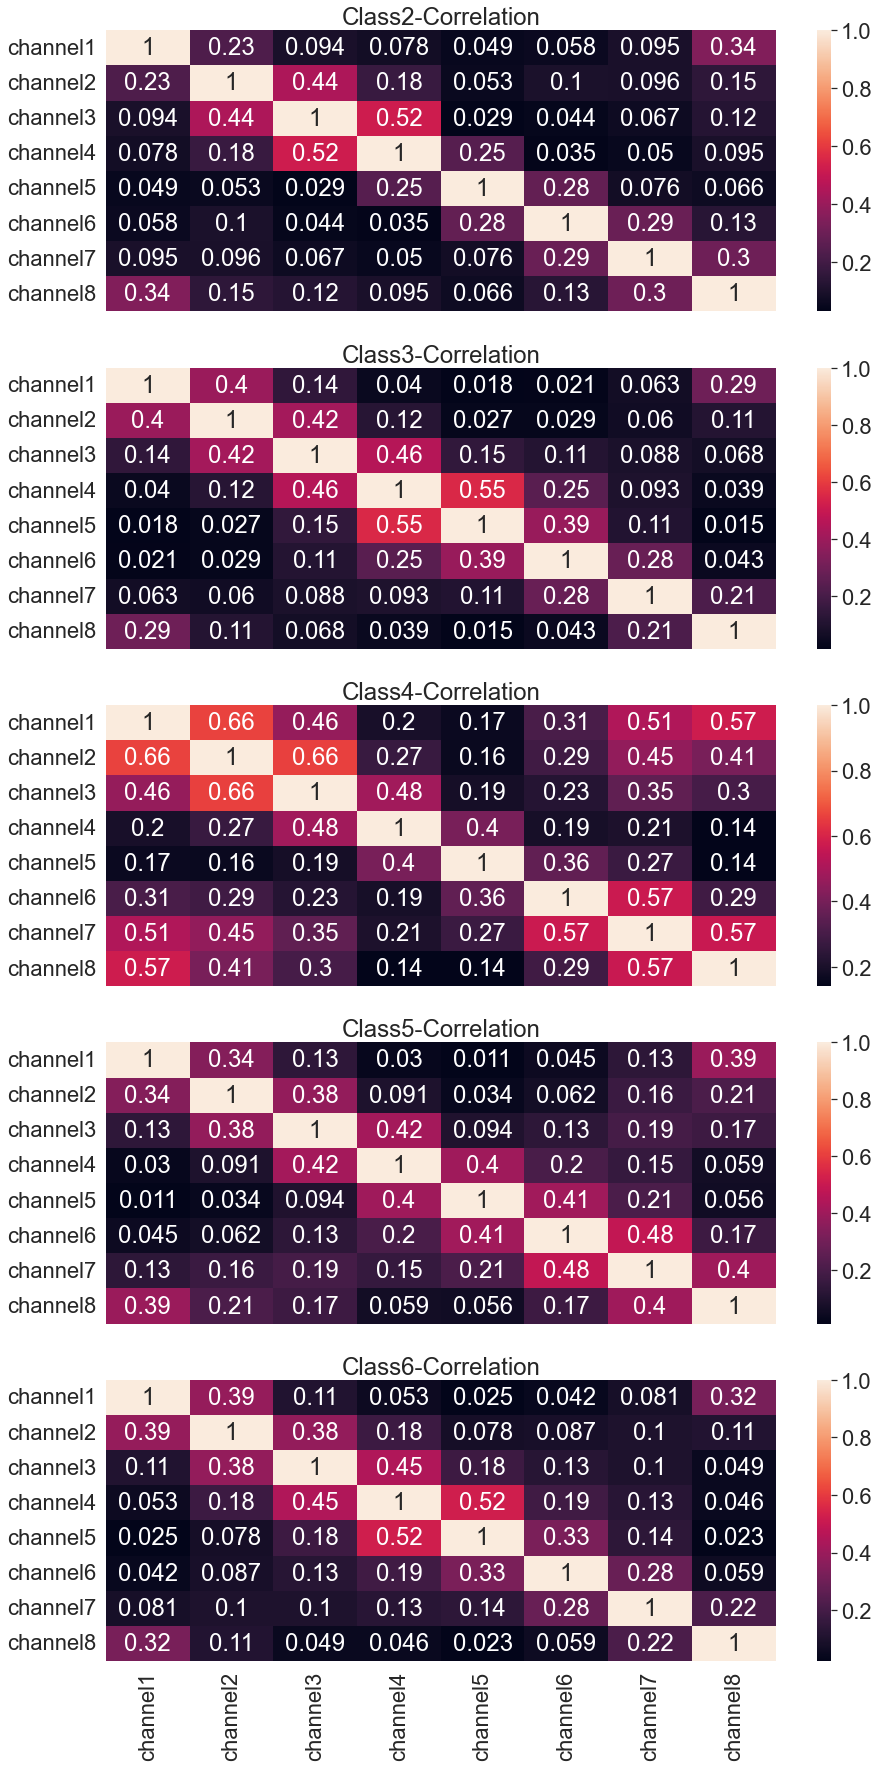

In [75]:
fig, axes = plt.subplots(5,1, sharex=True,sharey=True, figsize=(15,30))
sns.heatmap(df[df['class']==2].drop(columns=['time','label','class']).corr(),annot=True,ax=axes[0])
sns.heatmap(df[df['class']==3].drop(columns=['time','label','class']).corr(),annot=True,ax=axes[1])
sns.heatmap(df[df['class']==4].drop(columns=['time','label','class']).corr(),annot=True,ax=axes[2])
sns.heatmap(df[df['class']==5].drop(columns=['time','label','class']).corr(),annot=True,ax=axes[3])
sns.heatmap(df[df['class']==6].drop(columns=['time','label','class']).corr(),annot=True,ax=axes[4])
axes[0].set_title('Class2-Correlation');
axes[1].set_title('Class3-Correlation');
axes[2].set_title('Class4-Correlation');
axes[3].set_title('Class5-Correlation');
axes[4].set_title('Class6-Correlation');